<img src="ml2_group_assignment.png" width="800"/>

# <font color=green> Introduction </font>

The assignment is focused on solving the Forest Cover Type Prediction: https://www.kaggle.com/c/forest-cover-type-prediction/overview. This task proposes a classification problem: predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data).

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. 

**You must predict the Cover_Type for every row in the test set (565892 observations).**

<img src="tree_types.png" width="800"/>

# <font color=green> Table of contents </font>

* Data Analysis
* Exploratory Data Analysis
* Feature Engineering & Selection
* Compare Several Machine Learning Models
* Perform Hyperparameter Tuning on the Best Model
* Interpret Model Results
* Evaluate the Best Model with Test Data (replying the initiating question)
* Summary & Conclusions

# Sections 
* [Libaries used](#0)
* [1. Import Data](#1)
* [2. Data analysis](#2)  
  * [2.1.Explanation of variables](#2.1)
      * [1.2.1 XX](#2.1.1)
* [3. Exploratory Data Analysis](#3)
  * [3.1 Analysis of the Dataset using EDA](#3.1)
  * [3.2 D'Agostino and Pearson's Test](#3.2)  
  * [3.3 Checking Variable Completeness ](#3.3)
  * [3.4 Correlation Matrix ](#3.4)  
  * [3.5 Paired density, scatterplot matrix and 3D Graphics ](#3.5)   
  * [3.6 Categorial EDA ](#3.6) 
      * [3.6.1 Categorial Bar Diagrams](#3.6.1)  
      * [3.6.2.Violinplot with Dependent Variable](#3.6.2)  
      * [3.6.3.Treemap for categorial Data](#3.6.3) 
* [4. Baseline Model](#4)
  * [4.0 Prepare Data and Standardization](#4.0)
  * [4.1 Random Forest](#4.1) 
  * [4.2 Gradient Boosting](#4.2)  
  * [4.3 Decision Trees](#4.3)
  * [4.4 K-Nearest Neighbors (KNN)](#4.4)  
  * [4.5 Logistic Regression](#4.5) 
  * [4.6 Naive Bayes](#4.6) 


<img src="roosevelt-national-forest.jpeg" width=1200 height=800 align="center">

<a id='0'></a>
# <font color=green> Libraries used </font>

In [1]:
!pip install squarify

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns  # Graphing
import matplotlib.pyplot as plt
import squarify #treemap
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#from yellowbrick.classifier import ROCAUC
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.simplefilter(action='ignore', category=FutureWarning)

<a id='0'></a>
##  <font color=green>0.Import the Data </font>
Let’s load the training data and create data frame

In [3]:
data_train = pd.read_csv("train.csv")
data_train.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

In [4]:
data_train.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

Let's keep the original dataset for later comparisons and make a copy for the FE process

In [5]:
df_original = data_train.copy()

In [6]:
data_train.tail()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
15115            170             251            214  ...            0   
15116            249             221             91  ...            0   
15117            250             220             83  ...            0   
15118            229             237            119  ...            0   
15119            189             244            164  ...            0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
15115            0            0            0           3  
15116            0            0            0           3  
15117            0            0            0           3  
15118            0            0            0           3  
15119            0            0            0           3  

[5 rows x 56 columns]

In [7]:
data_test = pd.read_csv("test.csv")
data_test.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0  15121       2680     354     14                                 0   
1  15122       2683       0     13                                 0   
2  15123       2713      16     15                                 0   
3  15124       2709      24     17                                 0   
4  15125       2706      29     19                                 0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                             2684   
1                               0                             2654   
2                               0                             2980   
3                               0                             2950   
4                               0                             2920   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type31  \
0            196             214            156  ...            0   
1            201             216            152  ...            0   
2            206             208            137  ...            0   
3            208             201            125  ...            0   
4            210             195            115  ...            0   

   Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  
0            0            0            0            0  
1            0            0            0            0  
2            0            0            0            0  
3            0            0            0            0  
4            0            0            0            0  

[5 rows x 55 columns]

<a id='5.1'></a>
## <font color=green>  5.Feature Engineering<font>

<a id='5.1'></a>
### <font color=darkcyan> 5.1 Check for Anomalies and Outliers <font>

Since the z-score is sensitive to the  mean and standard deviation and its assumption of a normally distributed variable, we cannot use the z-score for outlier handling because of the skewed data. The disadvantage using percentile it considers always and outlier of the lowest or highest value, even there are no outliers. As the number of observations increases, so does the number of observations considered outliers; After all, using a percentile based method will always flat-out reject a certain percentage of our observations.Thus, we need to use the percentile with care. 

<a id='5.1.1'></a>
### <font color=darkcyan> 5.1.1 Outlier Detection Treatment using Inter-Quartile Range rule Function <font>

The IQR is the difference between the 75th and 25th percentile. The IQR is more resistant to outliers. The IQR by definition only covers the middle 50% of the data, so outliers are well outside this range and the presence of a small number of outliers is not likely to change this significantly. If you add an outlier, the IQR will change to another set of data points that are probably not that dissimilar to the previous ones (in most datasets), hence it is “resistant” to change. This is especially the case of a large dataset.

Now we are testing different ranges for IQR, namely 2,3 and 4 to check for more extreme outlier values. 

In [8]:
def outlier_function(df, col_name,value_IQR):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(value_IQR*IQR)
    lower_limit = first_quartile-(value_IQR*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

<a id='5.1.2'></a>
### <font color=darkcyan> 5.1.2 Inter-Quartile Range rule: 4 IQR from Median <font>

In [9]:
# loop through all columns to see if there are any outliers, for all values which are not only 0 and 1
for column in ["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]:
    if outlier_function(data_train, column,4)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(data_train, column,4)[2], column))

There are 13 outliers in Vertical_Distance_To_Hydrology
There are 1 outliers in Hillshade_9am


There is 1 record of Hillshade_9am with a zero value, which is a valid value as Hillshade can be zero. This is because there are parts in the mountain that never see the sunlight (blind spots). Hence we keep the value as it is. 

In [10]:
# removing outliers and testing baseline model
# calculate interquartile range
from numpy import percentile
q25, q75 = percentile(data_train['Vertical_Distance_To_Hydrology'], 25), percentile(data_train['Vertical_Distance_To_Hydrology'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 4
lower, upper = q25 - cut_off, q75 + cut_off
# remove outliers
data_train_vd_h = data_train[(data_train['Vertical_Distance_To_Hydrology'] > lower) & (data_train['Vertical_Distance_To_Hydrology'] < upper)]

Check if the model improves after removing vertical distance to hydrology 

In [11]:
X4=data_train_vd_h.drop(labels=['Id','Cover_Type'],axis=1)
y4=data_train_vd_h['Cover_Type']

In [12]:
from sklearn.preprocessing import StandardScaler
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
X4[scale_numerical]=scaler.fit_transform(X4[scale_numerical])

In [13]:
y4.value_counts()

5    2160
3    2160
6    2160
4    2160
1    2159
2    2157
7    2151
Name: Cover_Type, dtype: int64

In [14]:
X4_train,X4_val,y4_train,y4_val = train_test_split(X4,y4,random_state=37) #seed is 18!Cannot use stratify because the datset is unbalanced

In [15]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X4_train,y4_train)

Comparing the previous score with the new score after removing the outliers of vertical distance to Hydrology: previous __forest.score: 0.83968__

It improves slightly, hence removing these outliers turns to be the selected approach

In [16]:
# calculating accuracy_score
forest.score(X4_val,y4_val)

0.852263701350278

#### <font color=orange> Replacing with Median <font>
Since removing outliers improved performance of our model, using median values to keep a balanced sample set seems to be a reasonable approach. Otherwise the data becomes unbalanced, for which, other tools have to be used

In [17]:
med = np.median(data_train['Vertical_Distance_To_Hydrology'])
for i in data_train['Vertical_Distance_To_Hydrology']:
    if i > upper or i < lower:
            data_train['Vertical_Distance_To_Hydrology'] = data_train['Vertical_Distance_To_Hydrology'].replace(i, med)

In [18]:
Xmed=data_train.drop(labels=['Id','Cover_Type','Vertical_Distance_To_Hydrology'],axis=1)
ymed=data_train['Cover_Type']

In [19]:
from sklearn.preprocessing import StandardScaler
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
Xmed[scale_numerical]=scaler.fit_transform(Xmed[scale_numerical])

In [20]:
ymed.value_counts()

5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64

In [21]:
Xmed_train,Xmed_val,ymed_train,ymed_val = train_test_split(X4,y4,random_state=37) #seed is 18!Cannot use stratify because the datset is unbalanced

In [22]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(Xmed_train,ymed_train)

In [23]:
# calculating accuracy_score
forest.score(Xmed_val,ymed_val)

0.8498808578236696

Once again, model improves slightly, hence proving right the hypothesis of imputing with median values so to obtain a more balanced dataset

<a id='5.1.3'></a>
### <font color=darkcyan> 5.1.2 Inter-Quartile Range rule: 3 IQR from Median <font>

In [24]:
# loop through all columns to see if there are any outliers, for all values which are not only 0
# and 1
for column in ["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]:
    if outlier_function(data_train, column,3)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(data_train, column,3)[2], column))

There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 36 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points


In [25]:
# removing outliers and testing baseline model
# calculate interquartile range
from numpy import percentile
q25, q75 = percentile(data_train['Horizontal_Distance_To_Hydrology'], 25), percentile(data_train['Horizontal_Distance_To_Hydrology'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 3
lower, upper = q25 - cut_off, q75 + cut_off
# remove outliers
data_train_hd_h3 = data_train[(data_train['Horizontal_Distance_To_Hydrology'] > lower) & (data_train['Horizontal_Distance_To_Hydrology'] < upper)]

In [26]:
X3_hd=data_train_hd_h3.drop(labels=['Cover_Type'],axis=1)
y3_hd=data_train_hd_h3['Cover_Type']

In [27]:
from sklearn.preprocessing import StandardScaler
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
X3_hd[scale_numerical]=scaler.fit_transform(X3_hd[scale_numerical])

In [28]:
X_train_hd,X_val_hd,y_train_hd,y_val_hd = train_test_split (X3_hd,y3_hd,random_state=37) #seed is 18!

In [29]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X_train_hd,y_train_hd)

In [30]:
forest.score(X_val_hd,y_val_hd)

0.8516060525617202


#### <font color=darkcyan> Vertical Distance To Hydrology <font>

In [31]:
# removing outliers and testing baseline model
# calculate interquartile range
from numpy import percentile
q25, q75 = percentile(data_train['Vertical_Distance_To_Hydrology'], 25), percentile(data_train['Vertical_Distance_To_Hydrology'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 3
lower, upper = q25 - cut_off, q75 + cut_off
# remove outliers
data_train_vd_h3 = data_train[(data_train['Vertical_Distance_To_Hydrology'] > lower) & (data_train['Vertical_Distance_To_Hydrology'] < upper)]

In [32]:
X3=data_train_vd_h3.drop(labels=['Cover_Type'],axis=1)
y3=data_train_vd_h3['Cover_Type']

In [33]:
from sklearn.preprocessing import StandardScaler
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
X3[scale_numerical]=scaler.fit_transform(X3[scale_numerical])

In [34]:
X_train,X_val,y_train,y_val = train_test_split (X3,y3,random_state=37) #seed is 18!

In [35]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X_train,y_train)

The improvement from previous removal of outliers of Vertical Distance to Hydrology is not so incremental anymore in addition we would remove several points in the dataset, we will disregard this option of the 49 datapoints 

In [36]:
# calculating accuracy_score
forest.score(X_val,y_val)

0.8522938212675683

In [37]:
X_train.shape

(11311, 55)

#### <font color=darkcyan> Horizontal Distance To Roadways <font>
Taking out the outliers of roadways does not improve the model it actually gets worse.

In [38]:
# removing outliers and testing baseline model
# calculate interquartile range
from numpy import percentile
q25, q75 = percentile(data_train['Horizontal_Distance_To_Roadways'], 25), percentile(data_train['Horizontal_Distance_To_Roadways'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 3
lower, upper = q25 - cut_off, q75 + cut_off
# remove outliers
data_train_rw = data_train[(data_train['Horizontal_Distance_To_Roadways'] > lower) & (data_train['Horizontal_Distance_To_Roadways'] < upper)]

In [39]:
X3_rw=data_train_rw.drop(labels=['Cover_Type'],axis=1)
y3_rw=data_train_rw['Cover_Type']

In [40]:
from sklearn.preprocessing import StandardScaler
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
X3_rw[scale_numerical]=scaler.fit_transform(X3_rw[scale_numerical])

In [41]:
X_train,X_val,y_train,y_val = train_test_split (X3_rw,y3_rw,random_state=37) #seed is 18!

In [42]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X_train,y_train)

In [43]:
# calculating accuracy_score
forest.score(X_val,y_val)

0.8568783068783069

#### <font color=darkcyan> Horizontal Distance To Fire Points <font>
Taking out the outliers it does not improve the model either 

In [44]:
# removing outliers and testing baseline model
# calculate interquartile range
from numpy import percentile
q25, q75 = percentile(data_train['Horizontal_Distance_To_Fire_Points'], 25), percentile(data_train['Horizontal_Distance_To_Fire_Points'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 3
lower, upper = q25 - cut_off, q75 + cut_off
# remove outliers
data_train_fp = data_train[(data_train['Horizontal_Distance_To_Fire_Points'] > lower) & (data_train['Horizontal_Distance_To_Fire_Points'] < upper)]

In [45]:
X3_fp=data_train_fp.drop(labels=['Cover_Type'],axis=1)
y3_fp=data_train_fp['Cover_Type']

In [46]:
from sklearn.preprocessing import StandardScaler
scale_numerical =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points']
scaler = StandardScaler()
X3_fp[scale_numerical]=scaler.fit_transform(X3_fp[scale_numerical])

In [47]:
X_train,X_val,y_train,y_val = train_test_split (X3_fp,y3_fp,random_state=37) #seed is 18

In [48]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X_train,y_train)

In [49]:
# calculating accuracy_score
forest.score(X_val,y_val)

0.8577528689618361

In [50]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

vars = ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=data_train[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='all', jitter=.4)

In [51]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

vars = ['Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=data_train[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='all', jitter=.4)

In [52]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

vars = ['Hillshade_9am', 'Hillshade_Noon']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=data_train[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='all', jitter=.4)

<a id='5.2'></a>
## <font color=green> 5.2 Feature Transformation and Building of new features <font>

<a id='5.2.1'></a>
### <font color=green> 5.2.1 ID <font>


In [53]:
#We agree for the test to not remove ID because the ID is the unique indentifier to evaluate
#data_train.drop('Id',axis = 1, inplace = True)

### <font color=green> 5.2.2 Bivariate Combinations <font>

During feature engineering, we want to try to create a wide variety of interactions between multiple variables in order to create new variables. By manipulating them together, we create opportunities to have new and impactful features which could potentially impact our target variable, thus engineering our features. For this argument, we will create as many bivariate combinations of our predicting variables using the ‘combinations’ method from itertools library.It is also recommeneded to not make interactions with the dummy variables as these are either 0 or 1 and we will not get any additional information from making the interaction this way. Further, it is not recommended to use standardization before bivariate combinations as we want to increase the signal. <br>
Source: https://towardsdatascience.com/feature-engineering-combination-polynomial-features-3caa4c77a755 <br>
https://samchaaa.medium.com/preprocessing-why-you-should-generate-polynomial-features-first-before-standardizing-892b4326a91d

In order to use the bivariate combination we split the dataset for using it.Note this is not the split we will use later for testing the algorithm. This has only the purpose of testing all the combination and selecting the best once. 

In [54]:
# Identify and drop our target variable 'Cover_Type' from dataframe, 
# isolating our independent variables
X = data_train.drop('Cover_Type', axis = 1)

# Isolate our dependent variable as a feature
y = data_train['Cover_Type']

In [55]:
# Train Test Split (70/30 size), drop duplicates and missing values

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .3, random_state=42, stratify=y)

X_train.drop_duplicates(inplace = True)
X_train.dropna(inplace = True)

In [56]:
# Create every possible bivariate combination to be tested for feature engineering
from itertools import combinations

column_list = X_train.columns
filtered_column_list = [column for column in column_list if 'Soil_Type' not in column and 'Wilderness_Area' not in column and 'Id' not in column ] 
interactions = list(combinations(filtered_column_list, 2))
interactions

[('Elevation', 'Aspect'),
 ('Elevation', 'Slope'),
 ('Elevation', 'Horizontal_Distance_To_Hydrology'),
 ('Elevation', 'Vertical_Distance_To_Hydrology'),
 ('Elevation', 'Horizontal_Distance_To_Roadways'),
 ('Elevation', 'Hillshade_9am'),
 ('Elevation', 'Hillshade_Noon'),
 ('Elevation', 'Hillshade_3pm'),
 ('Elevation', 'Horizontal_Distance_To_Fire_Points'),
 ('Aspect', 'Slope'),
 ('Aspect', 'Horizontal_Distance_To_Hydrology'),
 ('Aspect', 'Vertical_Distance_To_Hydrology'),
 ('Aspect', 'Horizontal_Distance_To_Roadways'),
 ('Aspect', 'Hillshade_9am'),
 ('Aspect', 'Hillshade_Noon'),
 ('Aspect', 'Hillshade_3pm'),
 ('Aspect', 'Horizontal_Distance_To_Fire_Points'),
 ('Slope', 'Horizontal_Distance_To_Hydrology'),
 ('Slope', 'Vertical_Distance_To_Hydrology'),
 ('Slope', 'Horizontal_Distance_To_Roadways'),
 ('Slope', 'Hillshade_9am'),
 ('Slope', 'Hillshade_Noon'),
 ('Slope', 'Hillshade_3pm'),
 ('Slope', 'Horizontal_Distance_To_Fire_Points'),
 ('Horizontal_Distance_To_Hydrology', 'Vertical_Distanc

With these combinations, it would be incredibly tedious and time consuming to test individually every single combination. Instead, we will add each combination to a dictionary, and then index the respective dictionary items as arguments in an iterative __random forest regression__ and __logistic Regression__ and will select the top 5 best interaction variables. We only use for simplicity two algorithm and not all.

Add the top  interaction features (which exclude a categorical variable) to existing DF for feature engineered model

In [57]:
data_train

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0                221             232            148  ...            0   
1                220             235            151  ...            0   
2                234             238            135  ...            0   
3                238             238            122  ...            0   
4                220             234            150  ...            0   
...              ...             ...            ...  ...          ...   
15115            170             251            214  ...            0   
15116            249             221             91  ...            0   
15117            250             220             83  ...            0   
15118            229             237            119  ...            0   
15119            189             244            164  ...            0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0                0            0            0           5  
1                0            0            0           5  
2                0            0            0           2  
3                0            0            0           2  
4                0            0            0           5  
...            ...          ...          ...         ...  
15115            0           

Addition and division has been taken out as it created a lot of noise in the data. The division makes sense if it has a business meaning and the addition only if it is the same scale. However we will add the variables which have the same metrics together in a second step but not in a for loop. 

In [58]:
for (key, value) in interactions:
    data_train[key + '_x_' + value] = data_train[key] * data_train[value]
    #data_train[key + '_+_' + value] = data_train[key] + data_train[value]
    #data_train[key + '_divide_' + value] = data_train[key] / data_train[value]

In [59]:
# Adding only variables with the same metric scale like meters, index, etc 


In [60]:
pd.set_option('display.max_columns', None)
data_train

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                221             232            148   
1                220             235            151   
2                234             238            135   
3                238             238            122   
4                220             234            150   
...              ...             ...            ...   
15115            170             251            214   
15116            249             221             91   
15117            250             220             83   
15118            229             237            119   
15119            189             244            164   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                    6279                 1                 0   
1                                    6225                 1                 0   
2                                    6121                 1                 0   
3                                    6211                 1                 0   
4                                    6172                 1                 0   
...                                   ...               ...               ...   
15115                                1282                 0                 0   
15116                                1325                 0                 0   
15117                                1187                 0                 0   
15118                                 932                 0                 0   
15119                                 914                 0                 0   

       Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                     0                 0           0           0           0   
1                     0                 0           0           0           0   
2                     0                 0           0           0           0   
3                     0                 0           0           0           0   
4                     0                 0           0           0           0   
...                 ...               ...         ...         ...         ...   
15115  

### <font color=green> 5.2.3 Polynomial Features <font>
    
We have just seen how to make two variables interact together,but sometimes the relationship between dependent and independent variables are more complex and not linear. Polynomials is another way to create new features! A very strong (usually) option for new features is increasing the power of a single variable. For our purposes, we will try and see if all the existing variables, can improve our Baseline by being increased in power.<br>
Source: https://towardsdatascience.com/feature-engineering-combination-polynomial-features-3caa4c77a755

In [61]:
from sklearn.preprocessing import PolynomialFeatures

X_train_int_pf = data_train.iloc[:, 1:10]
X_train_int_pf

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           2596      51      3                               258   
1           2590      56      2                               212   
2           2804     139      9                               268   
3           2785     155     18                               242   
4           2595      45      2                               153   
...          ...     ...    ...                               ...   
15115       2607     243     23                               258   
15116       2603     121     19                               633   
15117       2492     134     25                               365   
15118       2487     167     28                               218   
15119       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  
0                221             232            148  
1                220             235            151  
2                234             238            135  
3                238             238            122  
4                220             234            150  
...              ...             ...            ...  
15115            170             251            214  
15116            249             221             91  
15117            250             220             83  
15118            229             237            119  
15119            189             244            164  

[15120 rows x 9 columns]

In [62]:
def PolynomialFeatures_labeled(input_df,power):
    '''Basically this is a cover for the sklearn preprocessing function. 
    The problem with that function is if you give it a labeled dataframe, it ouputs an unlabeled dataframe with potentially
    a whole bunch of unlabeled columns. 

    Inputs:
    input_df = Your labeled pandas dataframe (list of x's not raised to any power) 
    power = what order polynomial you want variables up to. (use the same power as you want entered into pp.PolynomialFeatures(power) directly)

    Ouput:
    Output: This function relies on the powers_ matrix which is one of the preprocessing function's outputs to create logical labels and 
    outputs a labeled pandas dataframe   
    '''
    poly = PolynomialFeatures(power)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_

    input_feature_names = list(input_df.columns)
    target_feature_names = ["Constant Term"]
    for feature_distillation in powers_nparray[1:]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s^%d" % (variable,power)
                if final_label == "":         #If the final label isn't yet specified
                    final_label = intermediary_label
                else:
                    final_label = final_label + " x " + intermediary_label
        target_feature_names.append(final_label)
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    return output_df



Polynominal features of degree two, since we have already enough information, we will not go for Polynominal three

In [63]:
output_df_pw2 = PolynomialFeatures_labeled(X_train_int_pf,2)
pd.set_option('display.max_columns', None)
output_df_pw2.shape

(15120, 55)

Few information are doubled with the previous dataframe, so we will have unique values, without ^1  as these columns are not needed 

In [64]:
column_list = output_df_pw2.columns
cols = [column for column in column_list if '^1' not in column]
output_df_pw2=output_df_pw2[cols]
output_df_pw2

Constant Term  Elevation^2  Aspect^2  Slope^2  \
0                1.0    6739216.0    2601.0      9.0   
1                1.0    6708100.0    3136.0      4.0   
2                1.0    7862416.0   19321.0     81.0   
3                1.0    7756225.0   24025.0    324.0   
4                1.0    6734025.0    2025.0      4.0   
...              ...          ...       ...      ...   
15115            1.0    6796449.0   59049.0    529.0   
15116            1.0    6775609.0   14641.0    361.0   
15117            1.0    6210064.0   17956.0    625.0   
15118            1.0    6185169.0   27889.0    784.0   
15119            1.0    6125625.0   38809.0   1156.0   

       Horizontal_Distance_To_Hydrology^2  Vertical_Distance_To_Hydrology^2  \
0                                 66564.0                               0.0   
1                                 44944.0                              36.0   
2                                 71824.0                            4225.0   
3                                 58564.0                           13924.0   
4                                 23409.0                               1.0   
...                                   ...                               ...   
15115                             66564.0                              49.0   
15116                            400689.0                           38025.0   
15117                            133225.0                           13689.0   
15118                             47524.0                           10201.0   
15119                            101761.0                            6084.0   

       Horizontal_Distance_To_Roadways^2  Hillshade_9am^2  Hillshade_Noon^2  \
0                               260100.0          48841.0           53824.0   
1                               152100.0          48400.0           55225.0   
2                             10112400.0          54756.0           56644.0   
3                              9548100.0          56644.0           56644.0   
4                               152881.0          48400.0           54756.0   
...                                  ...              ...               ...   
15115                           435600.0          28900.0           63001.0   
15116                           381924.0          62001.0           48841.0   
15117                           112225.0          62500.0           48400.0   
15118                            58564.0          52441.0           56169.0   
15119                            72900.0          35721.0           59536.0   

       Hillshade_3pm^2  
0              21904.0  
1              22801.0  
2              18225.0  
3              14884.0  
4              22500.0  
...                ...  
15115          45796.0  
15116           8281.0  
15117           6889.0  
15118          14161.0  
15119          26896.0  

[15120 rows x 10 columns]

In [65]:
data_train = pd.concat([data_train,output_df_pw2], axis=1)
data_train

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          1       2596      51      3                               258   
1          2       2590      56      2                               212   
2          3       2804     139      9                               268   
3          4       2785     155     18                               242   
4          5       2595      45      2                               153   
...      ...        ...     ...    ...                               ...   
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                221             232            148   
1                220             235            151   
2                234             238            135   
3                238             238            122   
4                220             234            150   
...              ...             ...            ...   
15115            170             251            214   
15116            249             221             91   
15117            250             220             83   
15118            229             237            119   
15119            189             244            164   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                    6279                 1                 0   
1                                    6225                 1                 0   
2                                    6121                 1                 0   
3                                    6211                 1                 0   
4                                    6172                 1                 0   
...                                   ...               ...               ...   
15115                                1282                 0                 0   
15116                                1325                 0                 0   
15117                                1187                 0                 0   
15118                                 932                 0                 0   
15119                                 914                 0                 0   

       Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                     0                 0           0           0           0   
1                     0                 0           0           0           0   
2                     0                 0           0           0           0   
3                     0                 0           0           0           0   
4                     0                 0           0           0           0   
...                 ...               ...         ...         ...         ...   
15115  

In [66]:
output_df_pw3 = PolynomialFeatures_labeled(X_train_int_pf,3)
output_df_pw3

Constant Term  Elevation^1  Aspect^1  Slope^1  \
0                1.0       2596.0      51.0      3.0   
1                1.0       2590.0      56.0      2.0   
2                1.0       2804.0     139.0      9.0   
3                1.0       2785.0     155.0     18.0   
4                1.0       2595.0      45.0      2.0   
...              ...          ...       ...      ...   
15115            1.0       2607.0     243.0     23.0   
15116            1.0       2603.0     121.0     19.0   
15117            1.0       2492.0     134.0     25.0   
15118            1.0       2487.0     167.0     28.0   
15119            1.0       2475.0     197.0     34.0   

       Horizontal_Distance_To_Hydrology^1  Vertical_Distance_To_Hydrology^1  \
0                                   258.0                               0.0   
1                                   212.0                              -6.0   
2                                   268.0                              65.0   
3                                   242.0                             118.0   
4                                   153.0                              -1.0   
...                                   ...                               ...   
15115                               258.0                               7.0   
15116                               633.0                             195.0   
15117                               365.0                             117.0   
15118                               218.0                             101.0   
15119                               319.0                              78.0   

       Horizontal_Distance_To_Roadways^1  Hillshade_9am^1  Hillshade_Noon^1  \
0                                  510.0            221.0             232.0   
1                                  390.0            220.0             235.0   
2                                 3180.0            234.0             238.0   
3                                 3090.0            238.0             238.0   
4                                  391.0            220.0             234.0   
...                                  ...              ...               ...   
15115                              660.0            170.0             251.0   
15116                              618.0            249.0             221.0   
15117                              335.0            250.0             220.0   
15118                              242.0            229.0             237.0   
15119                              270.0            189.0             244.0   

       Hillshade_3pm^1  Elevation^2  Elevation^1 x Aspect^1  \
0                148.0    6739216.0                132396.0   
1                151.0    6708100.0                145040.0   
2                135.0    7862416.0                389756.0   
3                122.0    7756225.0                431675.0   
4                150.0    6734025.0                116775.0   
...                ...          ...                     ...   
15115            214.0    6796449.0                633501.0   
15116             91.0    6775609.0                314963.0   
15117             83.0    6210064.0                333928.0   
15118            119.0    6185169.0                415329.0   
15119            164.0    6125625.0                487575.0   

       Elevation^1 x Slope^1  \
0                     7788.0   
1                     5180.0   
2                    25236.0   
3                    50130.0   
4                     5190.0   
...                      ...   
15115                59961.0   
15116                49457.0   
15117                62300.0   
15118                69636.0   
15119                84150.0   

       Elevation^1 x Horizontal_Distance_To_Hydrology^1  \
0                                              669768.0   
1                                              549080.0   
2                                              751472.0   
3                                              673970.0   

<a id='5.2.1'></a>
### <font color=green> 5.2.1 ID <font>

In [67]:
#We agree for the test to not remove ID because the ID is the unique indentifier to evaluate
data_train.drop('Id',axis = 1, inplace = True)

<a id='5.2.2'></a>
### <font color=green> 5.2.2 Distance To Hydrology <font>
#### <font color=green> New Features <font>

We combine Vertical distance to Hydrology and Horizontal distance to Hydrology since these two are highly correlated and also we can transform it into one variable which would give the distance to the closest water surface and using Pythagoras 
theorem for Distance calculation, since we have the horizontal and the vertical Distance. 
Source : https://towardsdatascience.com/types-of-transformations-for-better-normal-distribution-61c22668d3b9

In [68]:
data_train['Distance_To_Hydrology'] = data_train['Horizontal_Distance_To_Hydrology']**2 +data_train['Vertical_Distance_To_Hydrology']**2
data_train['Distance_To_Hydrology'] = data_train['Distance_To_Hydrology']**0.5
data_train.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1   
2            0        

#### <font color=green> Square root and logarithm Transformation  <font>

Now we are checking the distribution of the new created variable if further transformation is needed. The Distance to Hydrology is still positive skewed and has zero values. In order to use log we will use log + 1 in order to use logarithm with zero values. 

Source: https://www.youtube.com/watch?v=_c3dVTRIK9c and 

Source_2: https://towardsdatascience.com/types-of-transformations-for-better-normal-distribution-61c22668d3b9

As a rule of thump, the skewness can be interpreted as follows:
<img src="Skew.png" width=400 height=200 align="center">

Source: https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/

In [69]:
print('\033[95m'+"Skew before transformation\n", data_train['Distance_To_Hydrology'].skew(), 
      "\nmin\n", data_train['Distance_To_Hydrology'].min(),
      "\nmax\n", data_train['Distance_To_Hydrology'].max(),)

Skew before transformation
 1.4354101410236608 
min
 0.0 
max
 1356.9395712411072


In [70]:
#Using the log10+ 1 logarithm 
data_train['log10_Distance_To_Hydrology'] = np.log10(data_train['Distance_To_Hydrology']+1)

In [71]:
#Using the square root 
data_train['sqr_Distance_To_Hydrology'] = data_train['Distance_To_Hydrology']**0.5

#### <font color=green> Results after logarithm and <font color=darkcyan> Sqrare root Transformation<font>

In [72]:
print('\033[92m' +"Skew after Log transformation\n", data_train['log10_Distance_To_Hydrology'].skew(), 
      "\nmin\n", data_train['log10_Distance_To_Hydrology'].min(),
      "\nmax\n", data_train['log10_Distance_To_Hydrology'].max(),)

Skew after Log transformation
 -1.623986530892699 
min
 0.0 
max
 3.1328804441267675


In [73]:
print('\033[96m'+ "Skew after Square Root Transformation\n", data_train['sqr_Distance_To_Hydrology'].skew(), 
      "\nmin\n", data_train['sqr_Distance_To_Hydrology'].min(),
      "\nmax\n", data_train['sqr_Distance_To_Hydrology'].max(),)

Skew after Square Root Transformation
 0.03270410220511198 
min
 0.0 
max
 36.836660696120475


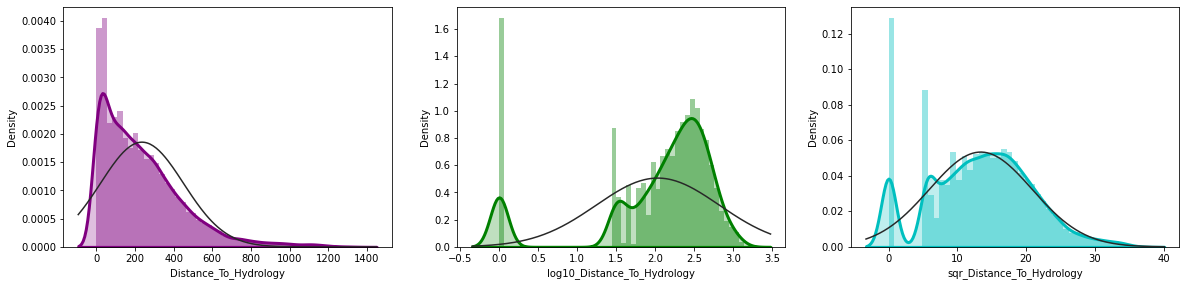

In [74]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(20,15))
f.add_subplot(331)
histPlot(data_train['Distance_To_Hydrology'], 'purple')
f.add_subplot(332)
histPlot(data_train['log10_Distance_To_Hydrology'], 'green')
f.add_subplot(333)
histPlot(data_train['sqr_Distance_To_Hydrology'], 'c')

As you can see above, for distance to Hydrology the __square root__ showed a better performance in terms of skewness and is closer to a normal bell shaped than the logarithm transformation. We will be using Square Root as a new feature in the dataset and will frop the others from the dataset.  

In [75]:
data_train.drop(['log10_Distance_To_Hydrology'], axis=1,inplace=True)

<a id='5.2.3'></a>
### <font color=green> 5.2.3 Horizontal Distance To Roadways <font>

#### <font color=green> Square root and logarithm Transformation  <font>

For log transformation there should be no zeros, negative values and the distribution should be positive skewed( bigger than 1 is positive) hence we are using the square root as you can see for logarithm transformation below the distribution did not improve!!!

In [76]:
print('\033[95m'+"Skew before Transformation\n", data_train['Horizontal_Distance_To_Roadways'].skew(), 
      "\nmin before Transformation\n", data_train['Horizontal_Distance_To_Roadways'].min(),
      "\nmax before Transformation\n", data_train['Horizontal_Distance_To_Roadways'].max(),)

Skew before Transformation
 1.247810678465482 
min before Transformation
 0 
max before Transformation
 6890


#### <font color=green> Results after logarithm and <font color=darkcyan> Square root Transformation<font>

In [77]:
# since we have null values we add plus 1 to avoid log of zero.We are using natural log and log10
data_train['Sqr_Horizontal_Distance_To_Roadways'] = data_train['Horizontal_Distance_To_Roadways']**0.5
data_train['log_Horizontal_Distance_To_Roadways'] = np.log(data_train['Horizontal_Distance_To_Roadways']+1)
data_train['log10_Horizontal_Distance_To_Roadways'] = np.log10(data_train['Horizontal_Distance_To_Roadways']+1)

In [78]:
print('\033[96m'+ "Skew after Square Root Transformation\n", data_train['Sqr_Horizontal_Distance_To_Roadways'].skew(), 
      "\nmin \n", data_train['Sqr_Horizontal_Distance_To_Roadways'].min(),
      "\nmax \n", data_train['Sqr_Horizontal_Distance_To_Roadways'].max(),)


Skew after Square Root Transformation
 0.47623044767204115 
min 
 0.0 
max 
 83.00602387778854


In [79]:
print('\033[92m' +"Skew after log Transformation\n", data_train['log_Horizontal_Distance_To_Roadways'].skew(), 
      "\nmin\n", data_train['log_Horizontal_Distance_To_Roadways'].min(),
      "\nmax\n", data_train['log_Horizontal_Distance_To_Roadways'].max(),)

Skew after log Transformation
 -0.6892190307043193 
min
 0.0 
max
 8.837971491357209


In [80]:
print('\033[92m'+ "Skew after log10 transformation\n", data_train['log10_Horizontal_Distance_To_Roadways'].skew(), 
      "\nmin \n", data_train['log10_Horizontal_Distance_To_Roadways'].min(),
      "\nmax \n", data_train['log10_Horizontal_Distance_To_Roadways'].max(),)

Skew after log10 transformation
 -0.6892190307043152 
min 
 0.0 
max 
 3.8382822499146885


In [81]:
# testing if the sqaure root is normally distributed and it shows it is not, however it is less skewed than before
stats.normaltest(data_train['Sqr_Horizontal_Distance_To_Roadways'])

NormaltestResult(statistic=593.4024989110219, pvalue=1.3940700201238209e-129)

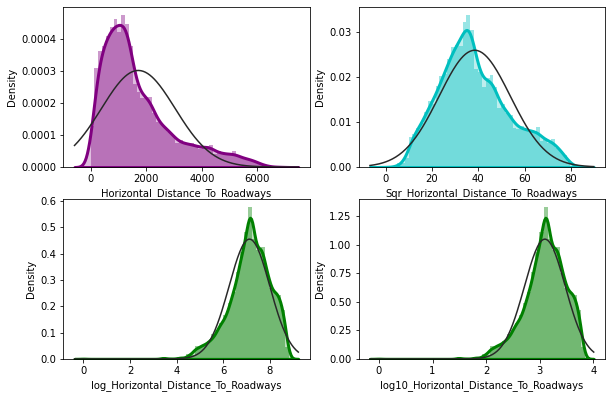

In [82]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(15,10))
f.add_subplot(331)
histPlot(data_train['Horizontal_Distance_To_Roadways'], 'purple')
f.add_subplot(334)
histPlot(data_train['log_Horizontal_Distance_To_Roadways'], 'green')
f.add_subplot(335)
histPlot(data_train['log10_Horizontal_Distance_To_Roadways'], 'green')
f.add_subplot(332)
histPlot(data_train['Sqr_Horizontal_Distance_To_Roadways'], 'c')

We achieved the best result for square root of the Horizontal Distance to Roadways. 

In [83]:
data_train.drop(['log_Horizontal_Distance_To_Roadways','log10_Horizontal_Distance_To_Roadways'], axis=1,inplace=True)

<a id='5.2.4'></a>
### <font color=green> 5.2.4 Slope <font>
#### <font color=green> Square root and logarithm Transformation  <font>

In [84]:
print('\033[95m'+ "Skew before transformation\n", data_train['Slope'].skew(), 
      "\nmin\n", data_train['Slope'].min(),
      "\nmax \n", data_train['Slope'].max(),)

Skew before transformation
 0.5236583382936286 
min
 0 
max 
 52


#### <font color=green> Results after logarithm and <font color=darkcyan> Sqrare root Transformation<font>

In [85]:
# since we have null values we add plus 1 to avoid log of zero
data_train['logSlope'] = np.log(data_train['Slope']+1)

In [86]:
print('\033[92m'+"Skew after log transformation\n", data_train['logSlope'].skew(), 
      "\nmin\n", data_train['logSlope'].min(),
      "\nmax\n", data_train['logSlope'].max(),)

Skew after log transformation
 -0.7530340055684758 
min
 0.0 
max
 3.970291913552122


In [87]:
data_train['SqrSlope'] = data_train['Slope']**0.5

In [88]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['SqrSlope'].skew(), 
      "\nmin\n", data_train['SqrSlope'].min(),
      "\nmax\n", data_train['SqrSlope'].max(),)

Skew after Square Root transformation
 -0.09875824995364099 
min
 0.0 
max
 7.211102550927978


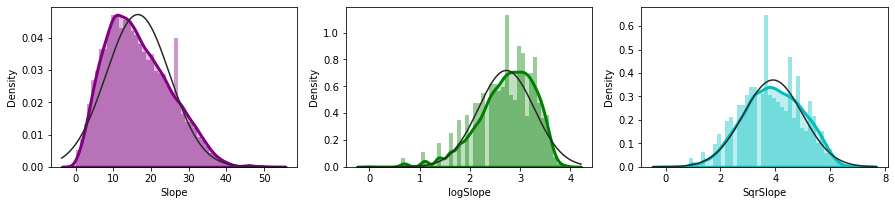

In [89]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(15,10))
f.add_subplot(331)
histPlot(data_train['Slope'], 'purple')
f.add_subplot(332)
histPlot(data_train['logSlope'], 'green')
f.add_subplot(333)
histPlot(data_train['SqrSlope'], 'c')

Since the skweness for the slope shows better performance when using the square root, we will transform the variable into square root as well. 

In [90]:
data_train.drop(['logSlope'], axis=1,inplace=True)

<a id='5.2.5'></a>
### <font color=green> 5.2.5 Horizontal Distance To Fire Points  <font>
#### <font color=green> Transformation  <font>

In [91]:
print('\033[95m'+"Skew before transformation\n", data_train['Horizontal_Distance_To_Fire_Points'].skew(), 
      "\nmin\n", data_train['Horizontal_Distance_To_Fire_Points'].min(),
      "\nmax\n", data_train['Horizontal_Distance_To_Fire_Points'].max(),)

Skew before transformation
 1.6170988738848289 
min
 0 
max
 6993


#### <font color=green> Results after logarithm and <font color=darkcyan> Sqrare root Transformation<font>

In [92]:
# since we have null values we add plus 1 to avoid log of zero
data_train['log_Horizontal_Distance_To_firepoints'] = np.log(data_train['Horizontal_Distance_To_Fire_Points']+1)

In [93]:
print('\033[92m'+"Skew after log transformation\n", data_train['log_Horizontal_Distance_To_firepoints'].skew(), 
      "\nmin\n", data_train['log_Horizontal_Distance_To_firepoints'].min(),
      "\nmax\n", data_train['log_Horizontal_Distance_To_firepoints'].max(),)

Skew after log transformation
 -0.6708653924261154 
min
 0.0 
max
 8.852807917623322


In [94]:
#Transform with square root
data_train['sqr_Horizontal_Distance_To_firepoints'] = data_train['Horizontal_Distance_To_Fire_Points']**0.5

In [95]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['sqr_Horizontal_Distance_To_firepoints'].skew(), 
      "\nmin\n", data_train['sqr_Horizontal_Distance_To_firepoints'].min(),
      "\nmax\n", data_train['sqr_Horizontal_Distance_To_firepoints'].max(),)

Skew after Square Root transformation
 0.5839887898581113 
min
 0.0 
max
 83.62415918859813


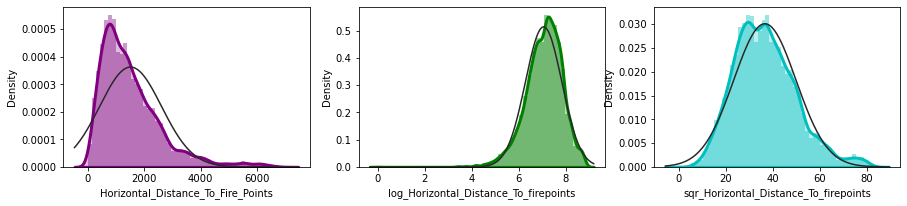

In [96]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(15,10))
f.add_subplot(331)
histPlot(data_train['Horizontal_Distance_To_Fire_Points'], 'purple')
f.add_subplot(332)
histPlot(data_train['log_Horizontal_Distance_To_firepoints'], 'green')
f.add_subplot(333)
histPlot(data_train['sqr_Horizontal_Distance_To_firepoints'], 'c')

Since square root transformation gives the best result in skewness, we will also use sqr for the feature variable.

In [97]:
data_train.drop(['log_Horizontal_Distance_To_firepoints'], axis=1,inplace=True)

<a id='5.2.6'></a>
### <font color=green> 5.2.6 Hillshades <font>
### <font color=green> 5.2.6.1 Mean Hillshade <font>
#### <font color=green> Creation of new Feature: Mean Hillshade <font>

In [98]:
# We take the average of Hillshades,which gives you the average light exposure of each cover type during the day
data_train['Mean_Hillshade'] = (data_train['Hillshade_9am']+data_train['Hillshade_Noon']+data_train['Hillshade_3pm'])/3

In [99]:
#Itensity of the Hillshade variables in 3 bin siizes with the bin discretizer
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
data_train['Mean_Hillshade_bin'] = est.fit_transform(data_train[['Mean_Hillshade']])

In [100]:
data_train[['Mean_Hillshade_bin','Mean_Hillshade']].describe()

Mean_Hillshade_bin  Mean_Hillshade
count        15120.000000    15120.000000
mean             1.768122      188.920635
std              0.460708       17.125035
min              0.000000      105.666667
25%              2.000000      180.333333
50%              2.000000      192.333333
75%              2.000000      201.333333
max              2.000000      213.666667

In [101]:
print('\033[95m'+"Skew before transformation\n", data_train['Mean_Hillshade'].skew(), 
      "\nmin\n", data_train['Mean_Hillshade'].min(),
      "\nmax\n", data_train['Mean_Hillshade'].max(),)

Skew before transformation
 -1.0903510485555057 
min
 105.66666666666667 
max
 213.66666666666666


#### <font color=green> Results after logarithm Transformation <font color=darkcyan>, Square root Transformation<font color=gold> and BoxCox Transformation<font>

In [102]:
data_train['log_Mean_Hillshade'] = np.log(data_train['Mean_Hillshade'])

In [103]:
print('\033[92m'+"Skew after log transformation\n", data_train['log_Mean_Hillshade'].skew(), 
      "\nmin\n", data_train['log_Mean_Hillshade'].min(),
      "\nmax\n", data_train['log_Mean_Hillshade'].max(),)

Skew after log transformation
 -1.4322026123219795 
min
 4.660289485209171 
max
 5.36441716825256


In [104]:
data_train['log10Mean_Hillshade'] = np.log10(data_train['Mean_Hillshade'])

In [105]:
print('\033[92m'+"Skew after log10 transformation\n", data_train['log10Mean_Hillshade'].skew(), 
      "\nmin\n", data_train['log10Mean_Hillshade'].min(),
      "\nmax\n", data_train['log10Mean_Hillshade'].max(),)

Skew after log10 transformation
 -1.4322026123219602 
min
 2.023938007498089 
max
 2.329736774799155


In [106]:
data_train['sqr_Mean_Hillshade'] = data_train['Mean_Hillshade']**0.5

In [107]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['sqr_Mean_Hillshade'].skew(), 
      "\nmin\n", data_train['sqr_Mean_Hillshade'].min(),
      "\nmax\n", data_train['sqr_Mean_Hillshade'].max(),)

Skew after Square Root transformation
 -1.25173398314383 
min
 10.279429296739517 
max
 14.617341299520465


In [108]:
#Now, the Box-Cox transformation also requires our data to only contain positive numbers
# transform training data with Boxcox
data_train['Mean_Hillshade_boxcox'], _ = stats.boxcox(data_train['Mean_Hillshade'])

In [109]:
print('\033[93m'+"Skew after Boxcox transformation\n", data_train['Mean_Hillshade_boxcox'].skew(), 
      "\nmin\n", data_train['Mean_Hillshade_boxcox'].min(),
      "\nmax\n", data_train['Mean_Hillshade_boxcox'].max(),)

Skew after Boxcox transformation
 -0.14515719864079077 
min
 9274946583.191551 
max
 382374055990.05743


In [110]:
stats.normaltest(data_train['Mean_Hillshade_boxcox'])

NormaltestResult(statistic=961.0422164343719, pvalue=2.052741503609043e-209)

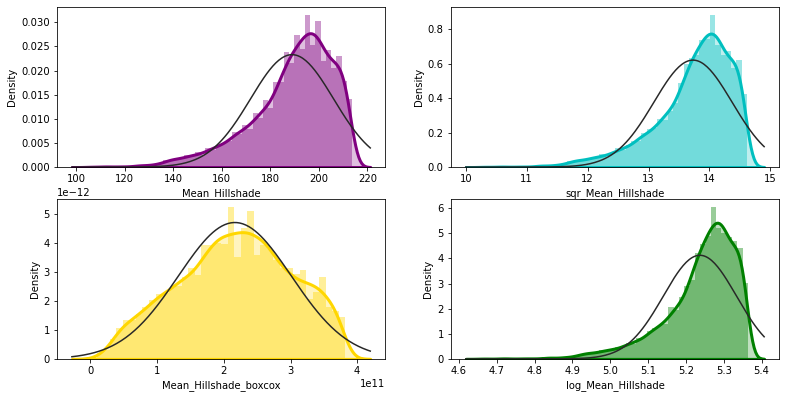

In [111]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(20,10))
f.add_subplot(331)
histPlot(data_train['Mean_Hillshade'], 'purple')
f.add_subplot(335)
histPlot(data_train['log_Mean_Hillshade'], 'green')
f.add_subplot(334)
histPlot(data_train['Mean_Hillshade_boxcox'], 'gold')                    
f.add_subplot(332)
histPlot(data_train['sqr_Mean_Hillshade'], 'c')

The distribution did not improve with Square Root and Logarithms Transformation. Hence we use BoxCox which improved the distribution substantially. 

In [112]:
data_train.drop(['log10Mean_Hillshade','log_Mean_Hillshade','sqr_Mean_Hillshade'], axis=1,inplace=True)

### <font color=green> 5.2.6.2 Hillshade 9am <font>
#### <font color=green> Transformation  <font>

In [113]:
print('\033[95m'+"Skew before transformation\n", data_train['Hillshade_9am'].skew(), 
      "\nmin\n", data_train['Hillshade_9am'].min(),
      "\nmax\n", data_train['Hillshade_9am'].max(),)

Skew before transformation
 -1.0936805605383073 
min
 0 
max
 254


#### <font color=green> Results after logarithm Transformation <font color=darkcyan>, Square root Transformation<font color=gold> and BoxCox Transformation<font>

In [114]:
data_train['log_Hillshade_9am'] = np.log(data_train['Hillshade_9am']+1)

In [115]:
print('\033[92m'+"Skew after log transformation\n", data_train['log_Hillshade_9am'].skew(), 
      "\nmin\n", data_train['log_Hillshade_9am'].min(),
      "\nmax\n", data_train['log_Hillshade_9am'].max(),)

Skew after log transformation
 -3.708953816677303 
min
 0.0 
max
 5.541263545158426


In [116]:
data_train['sqr_Hillshade_9am'] = data_train['Hillshade_9am']**0.5

In [117]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['sqr_Hillshade_9am'].skew(), 
      "\nmin\n", data_train['sqr_Hillshade_9am'].min(),
      "\nmax\n", data_train['sqr_Hillshade_9am'].max(),)

Skew after Square Root transformation
 -1.4741589700243982 
min
 0.0 
max
 15.937377450509228


In [118]:
#Now, the Box-Cox transformation also requires our data to only contain positive numbers, transform training data with Boxcox
data_train['Hillshade_9am_boxcox'], lam  = stats.boxcox(data_train['Hillshade_9am']+1)
#lam is the best lambda for the distribution

In [119]:
print('\033[93m'+"Skew after Boxcox transformation\n", data_train['Hillshade_9am_boxcox'].skew(), 
      "\nmin\n", data_train['Hillshade_9am_boxcox'].min(),
      "\nmax\n", data_train['Hillshade_9am_boxcox'].max(),)

Skew after Boxcox transformation
 -0.1964508631897843 
min
 0.0 
max
 147303558.7348688


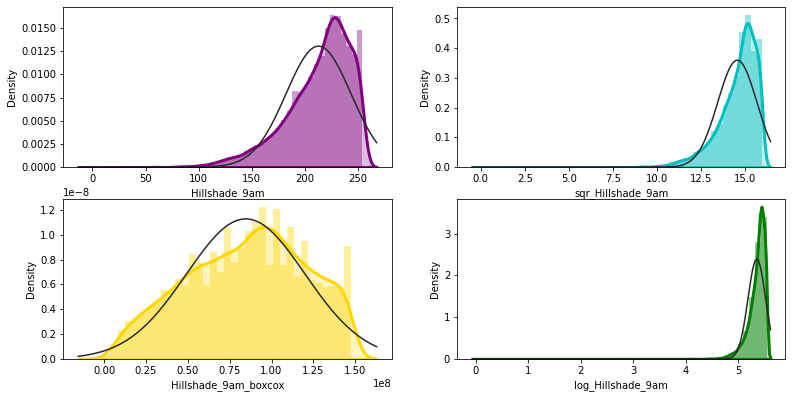

In [120]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(20,10))
f.add_subplot(331)
histPlot(data_train['Hillshade_9am'], 'purple')
f.add_subplot(335)
histPlot(data_train['log_Hillshade_9am'], 'green')
f.add_subplot(334)
histPlot(data_train['Hillshade_9am_boxcox'], 'gold')                    
f.add_subplot(332)
histPlot(data_train['sqr_Hillshade_9am'], 'c')

BoxCox outperforms the other two for the Hillshade 9am 

In [121]:
data_train.drop(['log_Hillshade_9am','sqr_Hillshade_9am'], axis=1,inplace=True)

### <font color=green> 5.2.6.3 Hillshade Noon <font>
#### <font color=green> Transformation  <font>

In [122]:
print('\033[95m'+"Skew before transformation\n", data_train['Hillshade_Noon'].skew(), 
      "\nmin\n", data_train['Hillshade_Noon'].min(),
      "\nmax\n", data_train['Hillshade_Noon'].max(),)

Skew before transformation
 -0.9532317074981783 
min
 99 
max
 254


#### <font color=green> Results after logarithm Transformation <font color=darkcyan>, Square root Transformation<font color=gold> and BoxCox Transformation<font>

In [123]:
data_train['log_Hillshade_Noon'] = np.log(data_train['Hillshade_Noon']+1)

In [124]:
print('\033[92m'+"Skew after log transformation\n", data_train['log_Hillshade_Noon'].skew(), 
      "\nmin\n", data_train['log_Hillshade_Noon'].min(),
      "\nmax\n", data_train['log_Hillshade_Noon'].max(),)

Skew after log transformation
 -1.4151877543194478 
min
 4.605170185988092 
max
 5.541263545158426


In [125]:
data_train['sqr_Hillshade_Noon'] = data_train['Hillshade_Noon']**0.5

In [126]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['sqr_Hillshade_Noon'].skew(), 
      "\nmin\n", data_train['sqr_Hillshade_Noon'].min(),
      "\nmax\n", data_train['sqr_Hillshade_Noon'].max(),)

Skew after Square Root transformation
 -1.1654338788107177 
min
 9.9498743710662 
max
 15.937377450509228


In [127]:
#Now, the Box-Cox transformation also requires our data to only contain positive numbers, transform training data with Boxcox
data_train['Hillshade_Noon_boxcox'], lam  = stats.boxcox(data_train['Hillshade_Noon'])
#lam is the best lambda for the distribution

In [128]:
print('\033[93m'+"Skew after Boxcox transformation\n", data_train['Hillshade_Noon_boxcox'].skew(), 
      "\nmin\n", data_train['Hillshade_Noon_boxcox'].min(),
      "\nmax\n", data_train['Hillshade_Noon_boxcox'].max(),)

Skew after Boxcox transformation
 -0.10142061186267355 
min
 23334179.80223645 
max
 1004797392.9966723


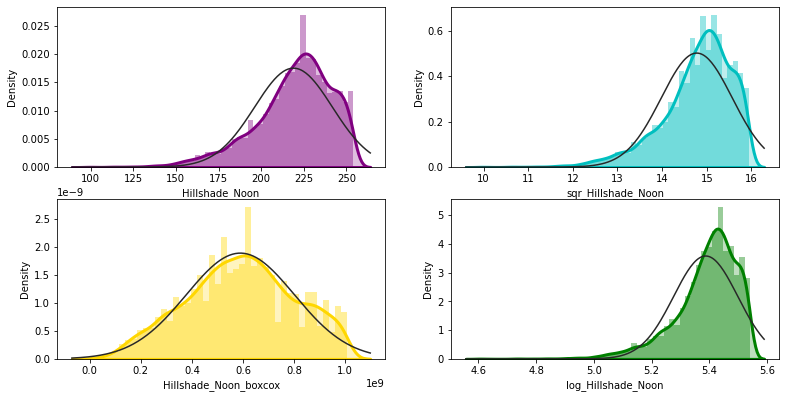

In [129]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(20,10))
f.add_subplot(331)
histPlot(data_train['Hillshade_Noon'], 'purple')
f.add_subplot(335)
histPlot(data_train['log_Hillshade_Noon'], 'green')
f.add_subplot(334)
histPlot(data_train['Hillshade_Noon_boxcox'], 'gold')                    
f.add_subplot(332)
histPlot(data_train['sqr_Hillshade_Noon'], 'c')

Box Coc is outperforming the other transformations for Hillshade Noon

In [130]:
data_train.drop(['log_Hillshade_Noon','sqr_Hillshade_Noon'], axis=1,inplace=True)

### <font color=green> 5.2.6.4 Hillshade 3pm <font>
#### <font color=green> Transformation  <font>

In [131]:
print('\033[95m'+"Skew before transformation\n", data_train['Hillshade_3pm'].skew(), 
      "\nmin\n", data_train['Hillshade_3pm'].min(),
      "\nmax\n", data_train['Hillshade_3pm'].max(),)

Skew before transformation
 -0.34082723258478564 
min
 0 
max
 248


#### <font color=green> Results after logarithm Transformation <font color=darkcyan>, Square root Transformation<font color=gold> and BoxCox Transformation<font>

In [132]:
data_train['log_Hillshade_3pm'] = np.log(data_train['Hillshade_3pm']+1)

In [133]:
print('\033[92m'+"Skew after log transformation\n", data_train['log_Hillshade_3pm'].skew(), 
      "\nmin\n", data_train['log_Hillshade_3pm'].min(),
      "\nmax\n", data_train['log_Hillshade_3pm'].max(),)

Skew after log transformation
 -4.40025450334946 
min
 0.0 
max
 5.517452896464707


In [134]:
data_train['sqr_Hillshade_3pm'] = data_train['Hillshade_3pm']**0.5

In [135]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['sqr_Hillshade_3pm'].skew(), 
      "\nmin\n", data_train['sqr_Hillshade_3pm'].min(),
      "\nmax\n", data_train['sqr_Hillshade_3pm'].max(),)

Skew after Square Root transformation
 -1.338669485611021 
min
 0.0 
max
 15.748015748023622


In [136]:
#Now, the Box-Cox transformation also requires our data to only contain positive numbers, transform training data with Boxcox
data_train['Hillshade_3pm_boxcox'], lam  = stats.boxcox(data_train['Hillshade_3pm']+1)
#lam is the best lambda for the distribution

In [137]:
print('\033[93m'+"Skew after Boxcox transformation\n", data_train['Hillshade_3pm_boxcox'].skew(), 
      "\nmin\n", data_train['Hillshade_3pm_boxcox'].min(),
      "\nmax\n", data_train['Hillshade_3pm_boxcox'].max(),)

Skew after Boxcox transformation
 -0.15018383894899204 
min
 0.0 
max
 552.0141106428457


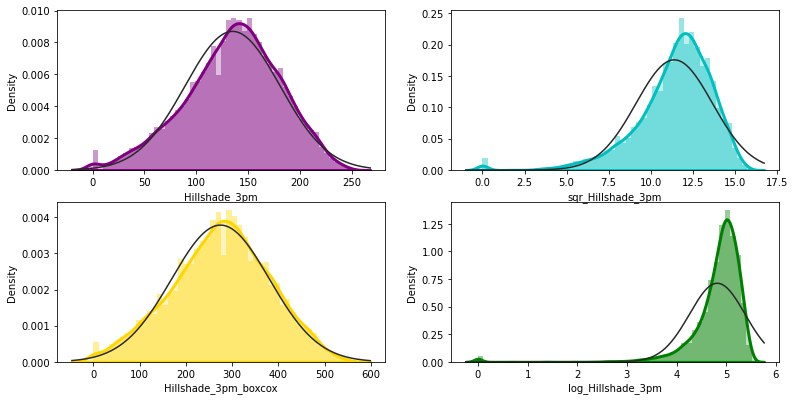

In [138]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(20,10))
f.add_subplot(331)
histPlot(data_train['Hillshade_3pm'], 'purple')
f.add_subplot(335)
histPlot(data_train['log_Hillshade_3pm'], 'green')
f.add_subplot(334)
histPlot(data_train['Hillshade_3pm_boxcox'], 'gold')                    
f.add_subplot(332)
histPlot(data_train['sqr_Hillshade_3pm'], 'c')

For the Hillshade 3pm the data was not highly skwed, we either keep the original or we can use boxcox as it improved the variables as well. 

In [139]:
data_train.drop(['log_Hillshade_3pm','sqr_Hillshade_3pm'], axis=1,inplace=True)

### <font color=green> 5.2.7.1 Aspect <font>
#### <font color=green> Transformation  <font>

In [140]:
print('\033[95m'+"Skew before transformation\n", data_train['Aspect'].skew(), 
      "\nmin\n", data_train['Aspect'].min(),
      "\nmax\n", data_train['Aspect'].max(),)

Skew before transformation
 0.4509352940316223 
min
 0 
max
 360


#### <font color=green> Results after logarithm Transformation <font color=darkcyan>and Square root Transformation<font>

In [141]:
data_train['sqr_Aspect'] = data_train['Aspect']**0.5

In [142]:
print('\033[96m'+"Skew after Square Root transformation\n", data_train['sqr_Aspect'].skew(), 
      "\nmin\n", data_train['sqr_Aspect'].min(),
      "\nmax\n", data_train['sqr_Aspect'].max(),)

Skew after Square Root transformation
 -0.12653305947211343 
min
 0.0 
max
 18.973665961010276


In [143]:
data_train['log_Aspect'] = np.log(data_train['Aspect']+1)

In [144]:
print('\033[92m'+"Skew after log transformation\n", data_train['log_Aspect'].skew(), 
      "\nmin\n", data_train['log_Aspect'].min(),
      "\nmax\n", data_train['log_Aspect'].max(),)

Skew after log transformation
 -1.4584406899303897 
min
 0.0 
max
 5.8888779583328805


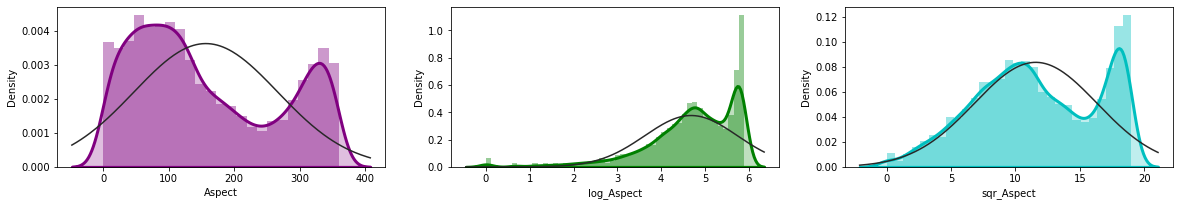

In [145]:
from scipy.stats import norm
import scipy.stats as stats

def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col,fit = norm,kde = True,kde_kws = {'shade': True, 'linewidth': 3});

f = plt.figure(figsize=(20,10))
f.add_subplot(331)
histPlot(data_train['Aspect'], 'purple')
f.add_subplot(332)
histPlot(data_train['log_Aspect'], 'green')
#f.add_subplot(334)
#histPlot(data_train['Hillshade_3pm_boxcox'], 'gold')                    
f.add_subplot(333)
histPlot(data_train['sqr_Aspect'], 'c')

For aspect square root turned out to be the best transformation in terms of skweness. 

In [146]:
data_train.drop(['log_Aspect'], axis=1,inplace=True)

### <font color=green> 5.2.6.4 Hillshades  Ratios <font>

In [147]:
data_train['ratio_Hillshade_3pm'] = data_train['Hillshade_3pm']/255
data_train['ratio_Hillshade_Noon'] = data_train['Hillshade_Noon']/255
data_train['ratio_Hillshade_9am'] = data_train['Hillshade_9am']/255

### <font color=green> 5.2.7.2 Aspect in degrees <font>
#### <font color=green> New Features  <font>
The azimuth is the angular direction of the sun, measured from north clockwise in degrees from 0 to 360. An Azimuth of 90 degrees is east.The Cut of values will be between for instance the middle of north and east.

* Aspect_North: from 315 deg to 45 deg
* Aspect_East: from 45 deg to 135 deg
* Aspect_South: from 135 deg to 225 deg
* Aspect_West: from 225 deg to 315 deg    

<img src="angle_azimuth.png" width=400 height=200 align="center">
    
Source:https://www.pveducation.org/pvcdrom/properties-of-sunlight/azimuth-angle

In [148]:
#Grouping Aspect in the four directions
data_train['Aspect_North']=  np.where(((data_train['Aspect']>=0) & (data_train['Aspect']<45))|((X_train['Aspect']>=315) & (X_train['Aspect']<=360)), 1 ,0)
data_train['Aspect_East']= np.where((data_train['Aspect']>=45) & (data_train['Aspect']<135), 1 ,0)
data_train['Aspect_South']= np.where((data_train['Aspect']>=135) & (data_train['Aspect']<225), 1 ,0)
data_train['Aspect_West']= np.where((data_train['Aspect']>=225) & (data_train['Aspect']<315), 1 ,0)

### <font color=green> 5.2.8 Elevation <font>

In [149]:
#No transformation as it is already very symetric distributed 
print('\033[95m'+"Skew before transformation\n", data_train['Elevation'].skew(), 
      "\nmin\n", data_train['Elevation'].min(),
      "\nmax\n", data_train['Elevation'].max(),)

Skew before transformation
 0.07563970693591461 
min
 1863 
max
 3849


In [150]:
# importing "math" for mathematical operations 
import math 
data_train['binned_elevation'] = [math.floor(v/50.0) for v in data_train['Elevation']]

In [151]:
#!pip install htmltabletomd

Addition and Substraction on the same scale
Using for loop was giving us a bad performance hence we are using the features on the same scale which to add or substract 

In [152]:
import htmltabletomd

### <font color=green> 5.2.9 Geoclimate grouping  <font>

#### <font color=green> 5.2.9.1 Climatic feature engineering to group soils  <font>

From original database donated by John A. Blackard

Code Designations:

Wilderness Areas:  	<br>

1 - Rawah Wilderness Area <br>
2 - Neota Wilderness Area  <br>
3 - Comanche Peak Wilderness Area<br>
4 - Cache la Poudre Wilderness Area<br>

Soil Types:             1 to 40 : based on the USFS Ecological
                        Landtype Units (ELUs) for this study area:<br>

  Study Code USFS ELU Code			Description<br>
	 1	   2702		Cathedral family - Rock outcrop complex, extremely stony.<br>
	 2	   2703		Vanet - Ratake families complex, very stony.<br>
	 3	   2704		Haploborolis - Rock outcrop complex, rubbly.<br>
	 4	   2705		Ratake family - Rock outcrop complex, rubbly.<br>
	 5	   2706		Vanet family - Rock outcrop complex complex, rubbly.<br>
	 6	   2717		Vanet - Wetmore families - Rock outcrop complex, stony.<br>
	 7	   3501		Gothic family.<br>
	 8	   3502		Supervisor - Limber families complex.<br>
	 9	   4201		Troutville family, very stony.<br>
	10	   4703		Bullwark - Catamount families - Rock outcrop complex, rubbly.<br>
	11	   4704		Bullwark - Catamount families - Rock land complex, rubbly.<br>
	12	   4744		Legault family - Rock land complex, stony.<br>
	13	   4758		Catamount family - Rock land - Bullwark family complex, rubbly.<br>
	14	   5101		Pachic Argiborolis - Aquolis complex.<br>
	15	   5151		unspecified in the USFS Soil and ELU Survey.<br>
	16	   6101		Cryaquolis - Cryoborolis complex.<br>
	17	   6102		Gateview family - Cryaquolis complex.<br>
	18	   6731		Rogert family, very stony.<br>
	19	   7101		Typic Cryaquolis - Borohemists complex.<br>
	20	   7102		Typic Cryaquepts - Typic Cryaquolls complex.<br>
	21	   7103		Typic Cryaquolls - Leighcan family, till substratum complex.<br>
	22	   7201		Leighcan family, till substratum, extremely bouldery.<br>
	23	   7202		Leighcan family, till substratum - Typic Cryaquolls complex.<br>
	24	   7700		Leighcan family, extremely stony.<br>
	25	   7701		Leighcan family, warm, extremely stony.<br>
	26	   7702		Granile - Catamount families complex, very stony.<br>
	27	   7709		Leighcan family, warm - Rock outcrop complex, extremely stony.<br>
	28	   7710		Leighcan family - Rock outcrop complex, extremely stony.<br>
	29	   7745		Como - Legault families complex, extremely stony.<br>
	30	   7746		Como family - Rock land - Legault family complex, extremely stony.<br>
	31	   7755		Leighcan - Catamount families complex, extremely stony.<br>
	32	   7756		Catamount family - Rock outcrop - Leighcan family complex, extremely stony.<br>
	33	   7757		Leighcan - Catamount families - Rock outcrop complex, extremely stony.<br>
	34	   7790		Cryorthents - Rock land complex, extremely stony.<br>
	35	   8703		Cryumbrepts - Rock outcrop - Cryaquepts complex.<br>
	36	   8707		Bross family - Rock land - Cryumbrepts complex, extremely stony.<br>
	37	   8708		Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.<br>
	38	   8771		Leighcan - Moran families - Cryaquolls complex, extremely stony.<br>
	39	   8772		Moran family - Cryorthents - Leighcan family complex, extremely <br>stony.
	40	   8776		Moran family - Cryorthents - Rock land complex, extremely stony.<br>

        Note:   First digit:  climatic zone       Second digit:  geologic zones
                1.  lower montane dry             1.  alluvium
                2.  lower montane                 2.  glacial
                3.  montane dry                   3.  shale
                4.  montane                       4.  sandstone
                5.  montane dry and montane       5.  mixed sedimentary
                6.  montane and subalpine         6.unspecified in the USFS ELU Survey
                7.  subalpine                     7.  igneous and metamorphic
                8.  alpine                        8.  volcanic

The USFD, an American federal agency for forest service dependent on the department of agriculture has classified soil types according to __climatic zone (first digit)__ and __geology (second digit)__. Because of this, we believe a similar classification can be artificially engineered grouping all similar soils in 7 categories for climate (there is no lower montane dry soils) and 4 for geology (we do not take into consideration shale, sandstone, volcanic or unspecified)

#### <font color=green> 5.2.9.2 Climatic Zone feature engineering to group soils  <font>

In [153]:
data_train["Lower_Montane_Climate"] = data_train.loc[:,data_train.columns.str.contains("^Soil_Type[23456]$")].max(axis=1)

In [154]:
data_train['Montane_Dry_Climate'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[78]$")].max(axis=1)

In [155]:
data_train['Montane_Climate'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[1][0123]$|Soil_Type[9]$")].max(axis=1)

In [156]:
data_train['Montane_Dry_and_Montane_Climate'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[1][45]$")].max(axis=1)

In [157]:
data_train['Montante_and_Subalpine_Climate'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[1][678]$")].max(axis=1)


In [158]:
data_train['Subalpine_Climate'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type19$|^Soil_Type[2][0-9]$|^Soil_Type[3][0-4]$")].max(axis=1)


In [159]:
data_train['Alpine_Climate'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[3][56789]$|Soil_Type40")].max(axis=1)

#### <font color=green> 5.2.9.2 Geological feature engineering to group soils  <font>

The USFD, an American federal agency for forest service dependent on the department of agriculture has classified soil types according to climatic zone (first digit) and geology (second digit). Because of this, we believe a similar classification can be artificially engineered grouping all similar soils in 7 categories for climate (there is no lower montane dry soils) and 4 for geology (we do not take into consideration shale, sandstone, volcanic or unspecified because there are not existing in the dataset).

        Note:   First digit:  climatic zone             Second digit:  geologic zones
                1.  lower montane dry                   1.  alluvium
                2.  lower montane                       2.  glacial
                3.  montane dry                         3.  shale
                4.  montane                             4.  sandstone
                5.  montane dry and montane             5.  mixed sedimentary
                6.  montane and subalpine               6.  unspecified in the USFS ELU Survey
                7.  subalpine                           7.  igneous and metamorphic
                8.  alpine                              8.  volcanic

In [160]:
data_train['Alluvium_Soil'] = data_train.loc[:,data_train.columns.str.contains("^Soil_Type[1][45679]$|^Soil_Type[2][01]$")].max(axis=1)

In [161]:
data_train['Glacial_Soil'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[9]$|^Soil_Type[2][23]$")].max(axis=1)

In [162]:
data_train['Mixed_Sedimentary_Soil'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[7-8]$")].max(axis=1)

In [163]:
data_train['Igneus_and_Metamorphic_Soil'] =data_train.loc[:,data_train.columns.str.contains("^Soil_Type[1-6]$|^Soil_Type[1][01238]$|^Soil_Type[3-4]\d$|^Soil_Type[2][4-9]$")].max(axis=1)

In [164]:
data_train.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1   
2            0        

Based on the medium paper "Preprocessing: Why you should generate polynominal features first before standardizing" mention it is not good practice to standardize the variablesbefore before PolynominalFeatures. This should be done after to not loss the signal of the variables.  

In [165]:
# Identify and drop our target variable 'Cover_Type' from dataframe, isolating our independent variables
X = data_train.drop('Cover_Type', axis = 1)

# Isolate our dependent variable as a feature
y = data_train['Cover_Type']

In [166]:
# Train Test Split (70/30 size), drop duplicates and missing values

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .3, random_state = 33, stratify=y)

X_train.drop_duplicates(inplace = True)
X_train.dropna(inplace = True)

### Soil Type Groupings

### Advanced Factorization

The numerical values present a level of detail that may be much more fine-grained than we need. For instance, the soil level can be represented by different categories (soil family, complex or stony/rubberly). We aggregate the data up which can help to avoid overfitting when the data is more aggregate: 

### <font color=green> 5.6 Soil Type Family  <font>

Using Discretization to bin the soil variable to the family type.<br>

__Cathedral__ <br>
1 Cathedral family - Rock outcrop complex, extremely stony.<br>

__Ratake__ <br>
2 Vanet - Ratake families complex, very stony.<br>
4 Ratake family - Rock outcrop complex, rubbly.<br>

__Vanet__<br>
5 Vanet family - Rock outcrop complex complex, rubbly.<br>

__Wetmore__<br>
6 Vanet - Wetmore families - Rock outcrop complex, stony.<br>

__Gothic__<br>
7 Gothic family.<br>
                    
__Limber__ <br>
8 Supervisor - Limber families complex. <br>

__Troutville__<br>
9 Troutville family, very stony.<br>

__Legault__<br>
12 Legault family - Rock land complex, stony.<br>
29 Como - Legault families complex, extremely stony.<br>

__Gateview__ <br>
17 Gateview family - Cryaquolis complex.<br>

__Rogert__<br>
18 Rogert family, very stony.<br>


__Como__<br>
30 Como family - Rock land - Legault family complex, extremely stony.<br>

__Bross__<br>
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.<br>



__Catamount__<br>
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.<br>
11 Bullwark - Catamount families - Rock land complex, rubbly.<br>
13 Catamount family - Rock land - Bullwark family complex, rubbly.<br>
26 Granile - Catamount families complex, very stony.<br>
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.<br>
31 Leighcan - Catamount families complex, extremely stony.<br>
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.<br>

__Leighcan__<br>
21 Typic Cryaquolls - Leighcan family, till substratum complex.<br>
22 Leighcan family, till substratum, extremely bouldery.<br>
23 Leighcan family, till substratum - Typic Cryaquolls complex.<br>
24 Leighcan family, extremely stony.<br>
25 Leighcan family, warm, extremely stony.<br>
27 Leighcan family, warm - Rock outcrop complex, extremely stony.<br>
28 Leighcan family - Rock outcrop complex, extremely stony.<br>

__Moran__<br>
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.<br>
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.<br>
40 Moran family - Cryorthents - Rock land complex, extremely stony.<br>

__Others__<br> 
3 Haploborolis - Rock outcrop complex, rubbly.<br>
15 unspecified in the USFS Soil and ELU Survey.<br>
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.<br>
34 Cryorthents - Rock land complex, extremely stony.<br>
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.<br>
20 Typic Cryaquepts - Typic Cryaquolls complex.<br>
14 Pachic Argiborolis - Aquolis complex.<br>
16 Cryaquolis - Cryoborolis complex.<br>
19 Typic Cryaquolis - Borohemists complex.<br>

### <font color=green> 5.6 Soil Type Complex  <font>

We will group the soil types according to their family and according to the complex and stonyness

Complex Group <br>
__Rock_outcrop_complex__ <br>
1 Cathedral family - Rock outcrop complex, extremely stony.<br>
2 Vanet - Ratake families complex, very stony.<br>
3 Haploborolis - Rock outcrop complex, rubbly.<br>
4 Ratake family - Rock outcrop complex, rubbly.<br>
5 Vanet family - Rock outcrop complex complex, rubbly.<br>
6 Vanet - Wetmore families - Rock outcrop complex, stony.<br>
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.<br>
27 Leighcan family, warm - Rock outcrop complex, extremely stony.<br>
28 Leighcan family - Rock outcrop complex, extremely stony.<br>
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.<br>

__Ratake_families_complex__<br>
2 Vanet - Ratake families complex, very stony.<br>


__Limber families complex__<br>
8 Supervisor - Limber families complex.<br>

__rock land complex__<br>
11 Bullwark - Catamount families - Rock land complex, rubbly.<br>
12 Legault family - Rock land complex, stony.<br>
34 Cryorthents - Rock land complex, extremely stony.<br>
40 Moran family - Cryorthents - Rock land complex, extremely stony.<br>

__Cryoborolis complex__<br>
16 Cryaquolis - Cryoborolis complex.<br>
17 Gateview family - Cryaquolis complex.<br>

__Bullwark family complex__<br>
13 Catamount family - Rock land - Bullwark family complex, rubbly.<br>

__Aquolis complex__<br>
14 Pachic Argiborolis - Aquolis complex.<br>

__Borohemists complex__<br>
19 Typic Cryaquolis - Borohemists complex.<br>

__Cryaquolls complex__<br>
20 Typic Cryaquepts - Typic Cryaquolls complex.<br>
23 Leighcan family, till substratum - Typic Cryaquolls complex.<br>
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.<br>

__till substratum complex__<br>
21 Typic Cryaquolls - Leighcan family, till substratum complex.<br>

__Catamount families complex__<br>
26 Granile - Catamount families complex, very stony.<br>
1 Leighcan - Catamount families complex, extremely stony.<br>
31 Leighcan - Catamount families complex, extremely stony.<br>

__Legault families complex__<br>
29 Como - Legault families complex, extremely stony.<br>
30 Como family - Rock land - Legault family complex, extremely stony.<br>

__Leighcan family complex__<br>
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.<br>
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.<br>

__Cryaquepts complex__<br>
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.<br>

__Cryumbrepts complex__<br>
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.<br>

__Cryorthents complex__<br>
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.<br>

__others__ <br>
7 Gothic family.<br>
9 Troutville family, very stony.<br>
22 Leighcan family, till substratum, extremely bouldery.<br>
24 Leighcan family, extremely stony.<br>
25 Leighcan family, warm, extremely stony.<br>
18 Rogert family, very stony.<br>
15 unspecified in the USFS Soil and ELU Survey.<br>


Source: https://www.kaggle.com/competitions/forest-cover-type-prediction/data

# <font color=green> 5.6 Soil Type Stonyness <font>

__Stony__ <br>
1 Cathedral family - Rock outcrop complex, extremely stony.<br>
2 Vanet - Ratake families complex, very stony.<br>
6 Vanet - Wetmore families - Rock outcrop complex, stony.<br>
9 Troutville family, very stony.<br>
12 Legault family - Rock land complex, stony.<br>
18 Rogert family, very stony.<br>
24 Leighcan family, extremely stony.<br>
25 Leighcan family, warm, extremely stony.<br>
26 Granile - Catamount families complex, very stony.<br>
27 Leighcan family, warm - Rock outcrop complex, extremely stony.<br>
28 Leighcan family - Rock outcrop complex, extremely stony.<br>
29 Como - Legault families complex, extremely stony.<br>
30 Como family - Rock land - Legault family complex, extremely stony.<br>
31 Leighcan - Catamount families complex, extremely stony.<br>
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.<br>
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.<br>
34 Cryorthents - Rock land complex, extremely stony.<br>
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.<br>
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.<br>
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.<br>
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.<br>
40 Moran family - Cryorthents - Rock land complex, extremely stony.<br>

__Rubbly__<br>
3 Haploborolis - Rock outcrop complex, rubbly.<br>
4 Ratake family - Rock outcrop complex, rubbly.<br>
5 Vanet family - Rock outcrop complex complex, rubbly.<br>
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.<br>
11 Bullwark - Catamount families - Rock land complex, rubbly.<br>
13 Catamount family - Rock land - Bullwark family complex, rubbly.<br>

__others__<br>
7 Gothic family.<br>
8 Supervisor - Limber families complex.<br>
14 Pachic Argiborolis - Aquolis complex.<br>
15 unspecified in the USFS Soil and ELU Survey.<br>
16 Cryaquolis - Cryoborolis complex.<br>
17 Gateview family - Cryaquolis complex.<br>
19 Typic Cryaquolis - Borohemists complex.<br>
20 Typic Cryaquepts - Typic Cryaquolls complex.<br>
21 Typic Cryaquolls - Leighcan family, till substratum complex.<br>
22 Leighcan family, till substratum, extremely bouldery.<br>
23 Leighcan family, till substratum - Typic Cryaquolls complex.<br>
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.<br>

In [167]:
# Soil Type
family_types = {
    'Type_Stony': ['Soil_Type1','Soil_Type2', 'Soil_Type6', 'Soil_Type9', 'Soil_Type12', 'Soil_Type18', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
    'Type_Rubbly': ['Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type10', 'Soil_Type11', 'Soil_Type13'],
    'Type_Other': ['Soil_Type7','Soil_Type8', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type35']
} 

for family in family_types:
    data_train[family] = 0
    soil_types = family_types[family]
    for soil_type in soil_types:
        data_train[family] += data_train[soil_type]

data_train

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           2596      51      3                               258   
1           2590      56      2                               212   
2           2804     139      9                               268   
3           2785     155     18                               242   
4           2595      45      2                               153   
...          ...     ...    ...                               ...   
15115       2607     243     23                               258   
15116       2603     121     19                               633   
15117       2492     134     25                               365   
15118       2487     167     28                               218   
15119       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                221             232            148   
1                220             235            151   
2                234             238            135   
3                238             238            122   
4                220             234            150   
...              ...             ...            ...   
15115            170             251            214   
15116            249             221             91   
15117            250             220             83   
15118            229             237            119   
15119            189             244            164   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                    6279                 1                 0   
1                                    6225                 1                 0   
2                                    6121                 1                 0   
3                                    6211                 1                 0   
4                                    6172                 1                 0   
...                                   ...               ...               ...   
15115                                1282                 0                 0   
15116                                1325                 0                 0   
15117                                1187                 0                 0   
15118                                 932                 0                 0   
15119                                 914                 0                 0   

       Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                     0                 0           0           0           0   
1                     0                 0           0           0           0   
2                     0                 0           0           0           0   
3                     0                 0           0           0           0   
4                     0                 0           0           0           0   
...                 ...               ...         ...         ...         ...   
15115                 1                 0           0           0           0   
15116  

Note: Soil type is a single variable which has been one-hot encoded presumably , so we will reverse engineer the soil type. We will eventually drop the original soil type columns which has the added effect of significantly reducing the total number of features.

In [168]:
# Original soil features
soil_features = [f'Soil_Type{i}' for i in range(1,41)]

In [169]:
# Drop original soil features
data_train.drop(columns = soil_features, inplace = True)

In [170]:
#test if elevation makes a difference to take out, no model improvements
#data_train = data_train.drop(['Elevation'], axis = 1)

In [171]:
# Test if model improves when dropping the normal scaled variables 
#data_train= data_train.drop(['Aspect','Slope','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points'], axis = 1)

### <font color=green> 5.10 Summary <font>

<table>
  <tr>
    <th><b>Features</b></th>
    <th><b>Transformation</b></th>
  </tr>
  <tr>
<td>ID  </td>
    <td> Drop</td>
  </tr>
  <tr>
    <td>Distance To Hydrology  </td>
    <td><b><i>Square Root</i></b> of the length of the side of horizontal and vertical </td>
  </tr>
  <tr>
    <td>Horizontal Distance To Roadways</td>
    <td><b>Square Root</b> of horizontal Distance to Roadways</td>
  </tr>
  <tr>
    <td> Slope</td>
    <td><b><i>Square Root</i></b> Slope</td>
  </tr>
  <tr>
    <td> Horizontal_Distance To firepoints</td>
    <td><b><i>Square Root</i></b> Horizontal Distance to firepoints</td>
  </tr>
  <tr>
    <td>Mean Hillshade</td>
    <td><b><i>Box Cox Average</i></b> of all Hillshades features</td>
  <tr>      
  </tr>
    <td>Hillshade 9am</td>
    <td><b><i>Box Cox </i></b> Hillshade 9am</td>
  <tr>      
  </tr>
    <td>Hillshade Noon</td>
    <td><b><i>Box Cox </i></b> Hillshade Noon</td>
  <tr>      
  </tr>
    <td>Hillshade 3pm</td>
    <td><b><i>Box Cox</i></b> Hillshade 3pm</td>
  <tr>      
  </tr>
        <td>Aspect</td>
    <td><b><i>Square Root</i></b> Aspect</td>
  <tr>      
  </tr>
    <td>Aspect North, East,South and West</td>
    <td><b><i>Grouping</i></b> Aspect</td>
  <tr>      
  </tr>
    <td>Geological Grouping</td>
    <td><b><i>Grouping</i></b> Soil Types</td>
  <tr>      
  </tr>
    <td>Climate Grouping</td>
    <td><b><i>Grouping</i></b> Soil Types</td>
  <tr>      
  </tr>
     <td>Soil Family</td>
    <td><b><i>Grouping</i></b> Soil Families</td>
  <tr>      
  </tr>
     <td>Soil Type Complex</td>
    <td><b><i>Grouping</i></b> Soil Complex</td>
  <tr>      
  </tr> 
     <td>Soil Type Stonyness</td>
    <td><b><i>Grouping</i></b> by Soil stonyness</td>
  <tr>      
  </tr>     

</table>

# <font color=green> 6.Feature Selection <font>


We will try to use several feature selection algorithms where we use them in combination of all the different selection method and will take the best score of all the used common algorithms score. Source: https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2 

### Locking all features in a csv

In [172]:
data_train.shape

(15120, 104)

In [173]:
#Only X_Train replacement
data_train.to_csv('all_features_data_train.csv')
data_train.to_csv('all_features_data_train.csv')

## <font color=green> 6.1. Standardization <font>

Selecting the most useful features to train the model can improve the performance of our models. 

In [174]:
pd.set_option('display.max_columns', None)
data_train.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Cover_Type  Elevation_x_Aspect  \
0                 0                 0           5              132396   
1                 0                 0           5              145040   
2                 0                 0           2              389756   
3                 0                 0           2              431675   
4                 0                 0           5              116775   

   Elevation_x_Slope  Elevation_x_Horizontal_Distance_To_Hydrology  \
0               7788                                        669768   
1               5180                                        549080   
2              25236                                        751472   
3              50130                                        673970   
4               5190                                        397035   

   Elevation_x_Vertical_Distance_To_Hydrology  \
0                                           0   
1                                      -15540   
2                                      182260   
3                                      328630   
4                                       -2595   

   Elevation_x_Horizontal_Distance_To_Roadways  Elevation_x_Hillshade_9am  \
0                                      1323960                     573716   
1                                      1010100                     569800   
2                                      8916720                     656136   
3                                      8605650                     662830   
4                                      1014645                     570900   

   Elevation_x_Hillshade_Noon  Elevation_x_Hillshade_3pm  \
0                      602272                     384208   
1                      608650                     391090   
2                      667352                     378540   
3                      662830                     339770   
4                      607230                     389250   

   Elevation_x_Horizontal_Distance_To_Fire_Points  Aspect_x_Slope  \
0                                        16300284             153   
1                                        16122750             112   
2                                        17163284            1251   
3                                        17297635            2790   
4                                        16016340              90   

   Aspect_x_Horizontal_Dist

We split the dataset to train and validation set, in order to test our models. We use stratify to have a balanced datset. 

In [175]:
X = data_train.drop(['Cover_Type'], axis=1)
y = data_train['Cover_Type']
column_list = X.columns

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)
print("The shape of validation data:{} and {} ".format(X_val.shape,y_val.shape))
print("The shape of training data:{} and {} ".format(X_train.shape,y_train.shape))

The shape of validation data:(3024, 103) and (3024,) 
The shape of training data:(12096, 103) and (12096,) 


For the standardization we need only numerical values, since these has been aleady encoded we use the names to filter out the dummy variables 

In [176]:
scale_numerical  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
scale_categorial= [column for column in column_list if column not in scale_numerical ]

In [177]:
# only the dummy variables filtered 
data_train.dtypes

Elevation                           int64
Aspect                              int64
Slope                               int64
Horizontal_Distance_To_Hydrology    int64
Vertical_Distance_To_Hydrology      int64
                                    ...  
Mixed_Sedimentary_Soil              int64
Igneus_and_Metamorphic_Soil         int64
Type_Stony                          int64
Type_Rubbly                         int64
Type_Other                          int64
Length: 104, dtype: object

In [178]:
numerical_train = data_train.filter(items=scale_numerical)

In [179]:
categorial_train = data_train.filter(items=scale_categorial)

In [180]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

In [181]:
X_train[scale_numerical] = scaler.fit_transform(X_train[scale_numerical])
X_val[scale_numerical] = scaler.fit_transform(X_val[scale_numerical])

In [182]:
X_train.describe()

Elevation        Aspect         Slope  \
count  1.209600e+04  1.209600e+04  1.209600e+04   
mean   2.005579e-16  2.845314e-17  2.770234e-16   
std    1.000041e+00  1.000041e+00  1.000041e+00   
min   -2.121953e+00 -1.423994e+00 -1.948927e+00   
25%   -8.970493e-01 -8.319240e-01 -7.678182e-01   
50%    7.273885e-03 -2.853982e-01 -1.772639e-01   
75%    8.493950e-01  9.351763e-01  6.495120e-01   
max    2.629333e+00  1.855161e+00  4.192838e+00   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      1.209600e+04                    1.209600e+04   
mean                      -8.737866e-18                   -4.313863e-18   
std                        1.000041e+00                    1.000041e+00   
min                       -1.079625e+00                   -2.875934e+00   
25%                       -7.605553e-01                   -7.737204e-01   
50%                       -2.224233e-01                   -3.102403e-01   
75%                        4.633379e-01                    4.677443e-01   
max                        5.196995e+00                    5.350839e+00   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     1.209600e+04   1.209600e+04    1.209600e+04   
mean                     -7.887944e-17   1.139548e-16    3.507996e-16   
std                       1.000041e+00   1.000041e+00    1.000041e+00   
min                      -1.299808e+00  -6.951518e+00   -5.261048e+00   
25%                      -7.212787e-01  -5.489538e-01   -5.258928e-01   
50%                      -3.015610e-01   2.350337e-01    1.756117e-01   
75%                       4.236809e-01   7.250258e-01    7.017401e-01   
max                       3.910741e+00   1.345683e+00    1.534777e+00   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count   1.209600e+04                        1.209600e+04      12096.000000   
mean   -2.210166e-16                        5.611234e-17          0.239087   
std     1.000041e+00                        1.000041e+00          0.426544   
min    -2.937994e+00                       -1.361184e+00          0.000000   
25%    -6.311134e-01                       -7.053558e-01          0.000000   
50%     6.530347e-02                       -2.399873e-01          0.000000   
75%     6.964313e-01                        4.212312e-01          0.000000   
max     2.459236e+00                        4.921290e+00          1.000000   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  \
count      12096.000000      12096.000000      12096.000000   
mean           0.033234          0.418651          0.309028   
std            0.179255          0.493358          0.462112   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000   
75%            0.000000          1.000000          1.000000   
max            1.000000          1.000000          1.000000   

       Elevation_x_Aspect  Elevation_x_Slope  \
count        1.209600e+04       1.209600e+04   
mean        -5.921006e-17      -5.345977e-17   
std          1.000041e+00       1.000041e+00   
min         -1.377280e+00      -2.039016e+00   
25%         -8.109041e-01      -7.592642e-01   
50%         -3.089819e-01      -8.305939e-02   
75%          7.836021e-01       6.549827e-01   
max          2.979054e+00       5.616151e+00   

       Elevation_x_Horizontal_Distance_To_Hydrology  \
count                                  1.209600e+04   
mean                                   8.923271e-17   
std                                    1.000041e+00   
min                                   -9.710980e-01   
25%                                   -7.167860e-01   
50%                                   -2.595228e-01   
75%                                    3.608106e-01   
max                                    5.617585e+00   

       Elevation

## <font color=green> 6.2. Number of feature selection  <font>

In [183]:
# no of maximum features we need to select
num_feats=46

We first fit a linear model to the initial dataset to have a baseline to evaluate the data cleaning and feature engineering impact.

To facilitate the training process, we will use the `sklearn` library <https://scikit-learn.org/stable/index.html> that provides a wrapper for the preprocessing, training, and evaluation of many machine learning algorithms. 

In [184]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

initial_lm_mod = linear_model.LogisticRegression(multi_class='multinomial',
   max_iter=10000, penalty='none',n_jobs=-1)

#initial_lm_mod = RandomForestRegressor(n_estimators=150)
baseline_acc = np.mean(
    cross_val_score(initial_lm_mod, X_train,y_train, cv=5))

print(f"Baseline model with Accuracy = {baseline_acc:.4}")

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

Baseline model with Accuracy = 0.7508


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [185]:
def get_feature_importance(clf, feature_names):
    """
    Function to print the most important features of a logreg classifier
    based on the coefficient values
    """
    return pd.DataFrame(
        {
            'variable': feature_names, # Feature names
            'coefficient': clf.coef_[0] # Feature Coeficients
        }
    ) \
    .round(decimals=2) \
    .sort_values('coefficient', ascending=False) \
    .style.bar(color=['red', 'green'], align='zero')

In [186]:
get_feature_importance(
    initial_lm_mod.fit(X_val,y_val), 
    X_train.columns.get_level_values(0).tolist()
)

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## <font color=green> Embedded Method <font>
## <font color=green> 6.4. Lasso Regularization <font>

When applying regularization to a Machine Learning model, we add a penalty to the model parameters to avoid that our model tries to resemble too closely our input data. In this way, we can make our model less complex and we can avoid overfitting (making learn to our model, not just the key data characteristics but also it’s intrinsic noise).
One of the possible Regularization Methods is Lasso (L1) Regression. When using Lasso Regression, the coefficients of the inputs features gets shrunken if they are not positively contributing to our Machine Learning model training. In this way, some of the features might get automatically discarded assigning them coefficients equal to zero.

In [187]:
lasso_mod = linear_model.LogisticRegression(penalty='l1', solver='liblinear',n_jobs=8)
print("Accuracy = {:.4}".format(np.mean(cross_val_score(lasso_mod, X_train, y_train, cv=5))))

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not ha

Accuracy = 0.7335


In [188]:
get_feature_importance(lasso_mod.fit(X_train,y_train), X_train.columns.get_level_values(0).tolist())

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.



Similar performance w.r.t the un-regularized models. However, you can see how the feature coefficients are smaller than the original ones, due to the regularization.

Let's look at how the coefficient weights and accuracy scores change along with the different regularization values.
To that end, I have implemented the following piece of code. Do not be overwhelmed by it. It basically defines a list of regularization values to test and train a new Logistic Regression model for one of these regularization values. We keep track of the coefficient values and the accuracy of each of these models to plot them according to the defined regularization parameters.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not ha

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not ha

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not ha

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not ha

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not ha

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not ha

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not ha

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not ha

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not ha

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not ha

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not ha

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not ha

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not ha

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not ha

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not ha

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not ha

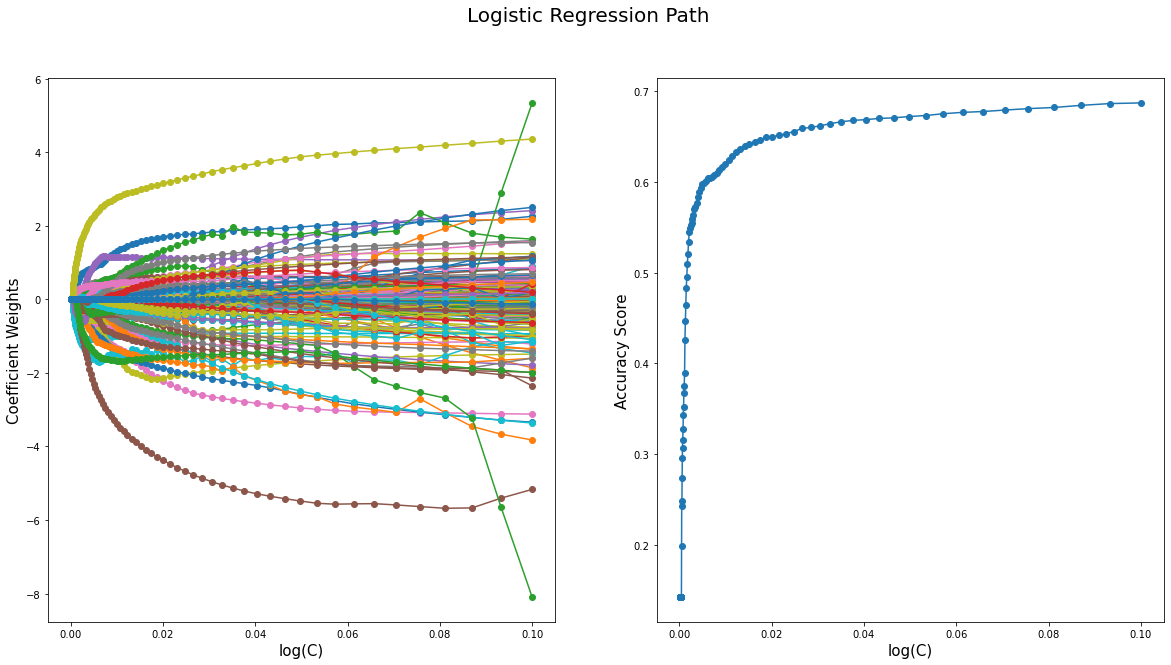

In [189]:
lasso_mod = linear_model.LogisticRegression(penalty='l1',solver='liblinear',n_jobs=8)
alphas = 10**np.linspace(-1,-4,100)

coefs_ = []
scores_ = []
for a in alphas:
    lasso_mod.set_params(C=a)
    scores_.append(np.mean(cross_val_score(lasso_mod, X_train, y_train, cv=5))) # Appends the accuracy of the model
    coefs_.append(lasso_mod.fit(X_train, y_train).coef_.ravel().copy()) # Appends the coefficient of the model

coefs_ = np.array(coefs_)
scores_ = np.array(scores_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Logistic Regression Path', fontsize=20)

# Coeff Weights Plot
ax1.plot(alphas, coefs_, marker='o')
ymin, ymax = plt.ylim()
ax1.set_ylabel('Coefficient Weights', fontsize = 15)
ax1.set_xlabel('log(C)', fontsize = 15)
ax1.axis('tight')

# Accuracy Plot
ax2.plot(alphas, scores_, marker='o')
ymin, ymax = plt.ylim()
ax2.set_ylabel('Accuracy Score', fontsize = 15)
ax2.set_xlabel('log(C)', fontsize = 15)
ax2.axis('tight')

plt.show()

As you can see in the left figure, the smaller the alpha value (alpha), the larger the regularization and, consequently, the smaller the weights of the coefficients. This is because, if we check the sklearn documentation, we will see that this value is the: "Inverse of regularization strength."
When regularization is large enough (i.e., alpha is small), the values of the coefficients are close to 0 (i.e., null model).
As there is a trade-off between variance (i.e., less over-fitted model --> more regularization) and bias (i.e., learning more from the training set --> less regularization), You must find the optimal alpha value. As you can see in the right figure, this value is achieved with small alpha values (i.e., more regularization). This specific value is not always the same since it depends on your data and the prediction problem.
To automatize the process of finding the optimal value, you can make use of the LogisticRegressionCV function in sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) that performs CV, testing different hyperparameters (that you can provide) and selecting the optimal one.

In [190]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(C=0.04,penalty='l1',solver='liblinear',max_iter=1000,n_jobs=-1), max_features=num_feats)
embeded_lr_selector.fit(X_train, y_train)

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.



SelectFromModel(estimator=LogisticRegression(C=0.04, max_iter=1000, n_jobs=-1,
                                             penalty='l1', solver='liblinear'),
                max_features=46)

In [191]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_train.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

46 selected features


In [192]:
embeded_lr_feature

['Elevation',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Elevation_x_Horizontal_Distance_To_Hydrology',
 'Elevation_x_Hillshade_9am',
 'Aspect_x_Horizontal_Distance_To_Roadways',
 'Slope_x_Horizontal_Distance_To_Hydrology',
 'Slope_x_Vertical_Distance_To_Hydrology',
 'Slope_x_Horizontal_Distance_To_Roadways',
 'Slope_x_Hillshade_9am',
 'Slope_x_Hillshade_3pm',
 'Slope_x_Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Hydrology_x_Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Hydrology_x_Hillshade_Noon',
 'Horizontal_Distance_To_Hydrology_x_Hillshade_3pm',
 'Horizontal_Distance_To_Hydrology_x_Horizontal_Distance_To_Fire_Points',
 'Vertical_Distance_To_Hydrology_x_Hillshade_9am',
 'Vertical_Distance_To_Hydrology_x_Hillshade_3pm',
 'Vertical_Distance_To_Hydrology_x_Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Roadways_x_Horizontal_Distance_To_Fire_Points',
 'Hillshade_9am_x_Hillshade_Noon',
 'Hillshade_9

## <font color=green> 6.3. Filter Method <font>
### <font color=green> 6.5. Anova F-value <font>
Chi-Square does not work because it needs non - negative values. For that reason we can use Anova. It is a univariate filter method that uses variance to find out the separability of the individual features between classes. It applies to multi-class endpoints.


In [193]:
#Code from class Forum, select the best features 
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
anov_selector = SelectKBest(f_classif, k=num_feats)
anov_selector.fit(X_train, y_train)

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning:

Features [59] are constant.

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning:

invalid value encountered in true_divide



SelectKBest(k=46)

In [194]:
anov_support = anov_selector.get_support()
# Get  columns from original dataframe
anov_feature = X_train.iloc[:,anov_support].columns.tolist()
print(str(len(anov_feature)), 'selected features')


46 selected features


## <font color=green> 6.3. Filter Method <font>
### <font color=green> 6.5. Pearson correlation <font>

/Users/stephaniegessler/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



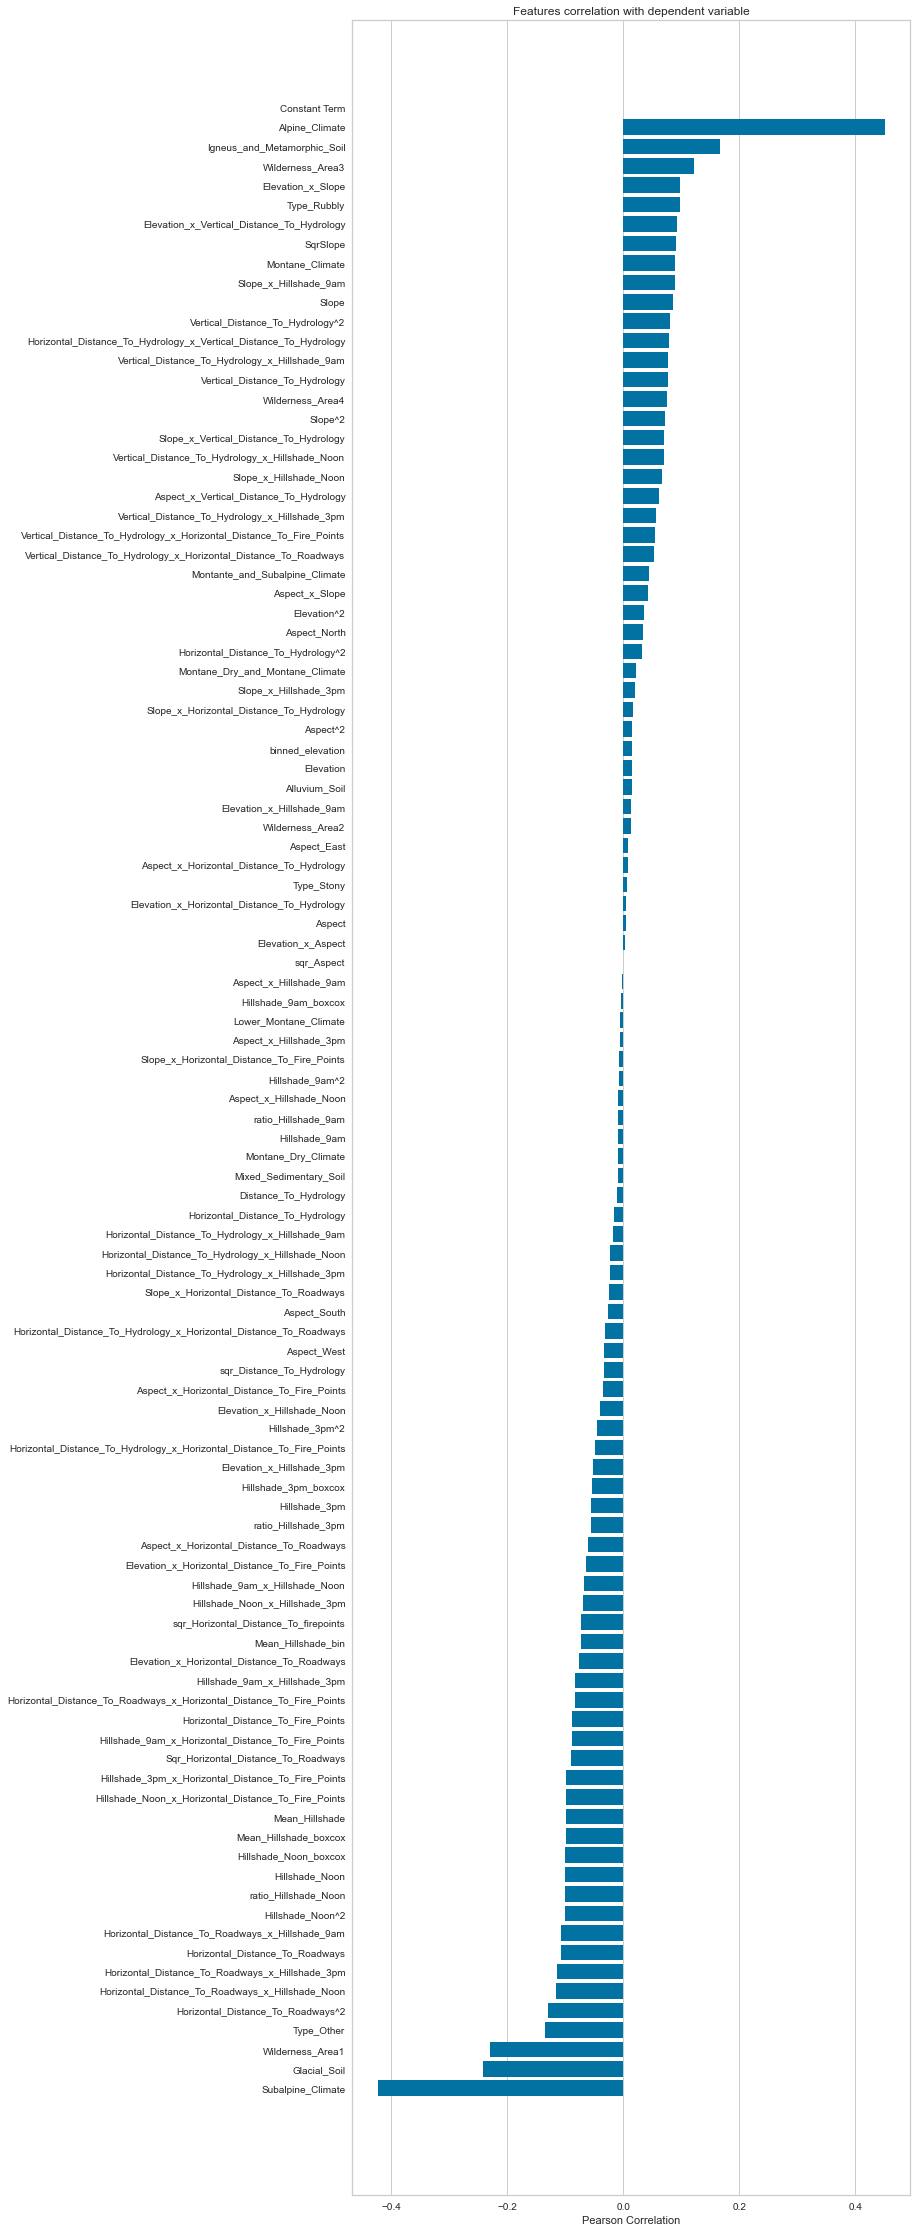

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [195]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

#X, y = data_train['data'], data_train['Cover_Type']

# Create a list of the feature names
#features = np.array(data['feature_names'])
fig, ax = plt.subplots(figsize=(10,40))         # Sample figsize in inches
# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=None,sort=True)

ax = visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [196]:
pd.set_option('display.max_columns', None)

In [197]:
corr = data_train.corrwith(data_train["Cover_Type"])
X_y = data_train.copy()
X_y['Cover_Type'] = y_train

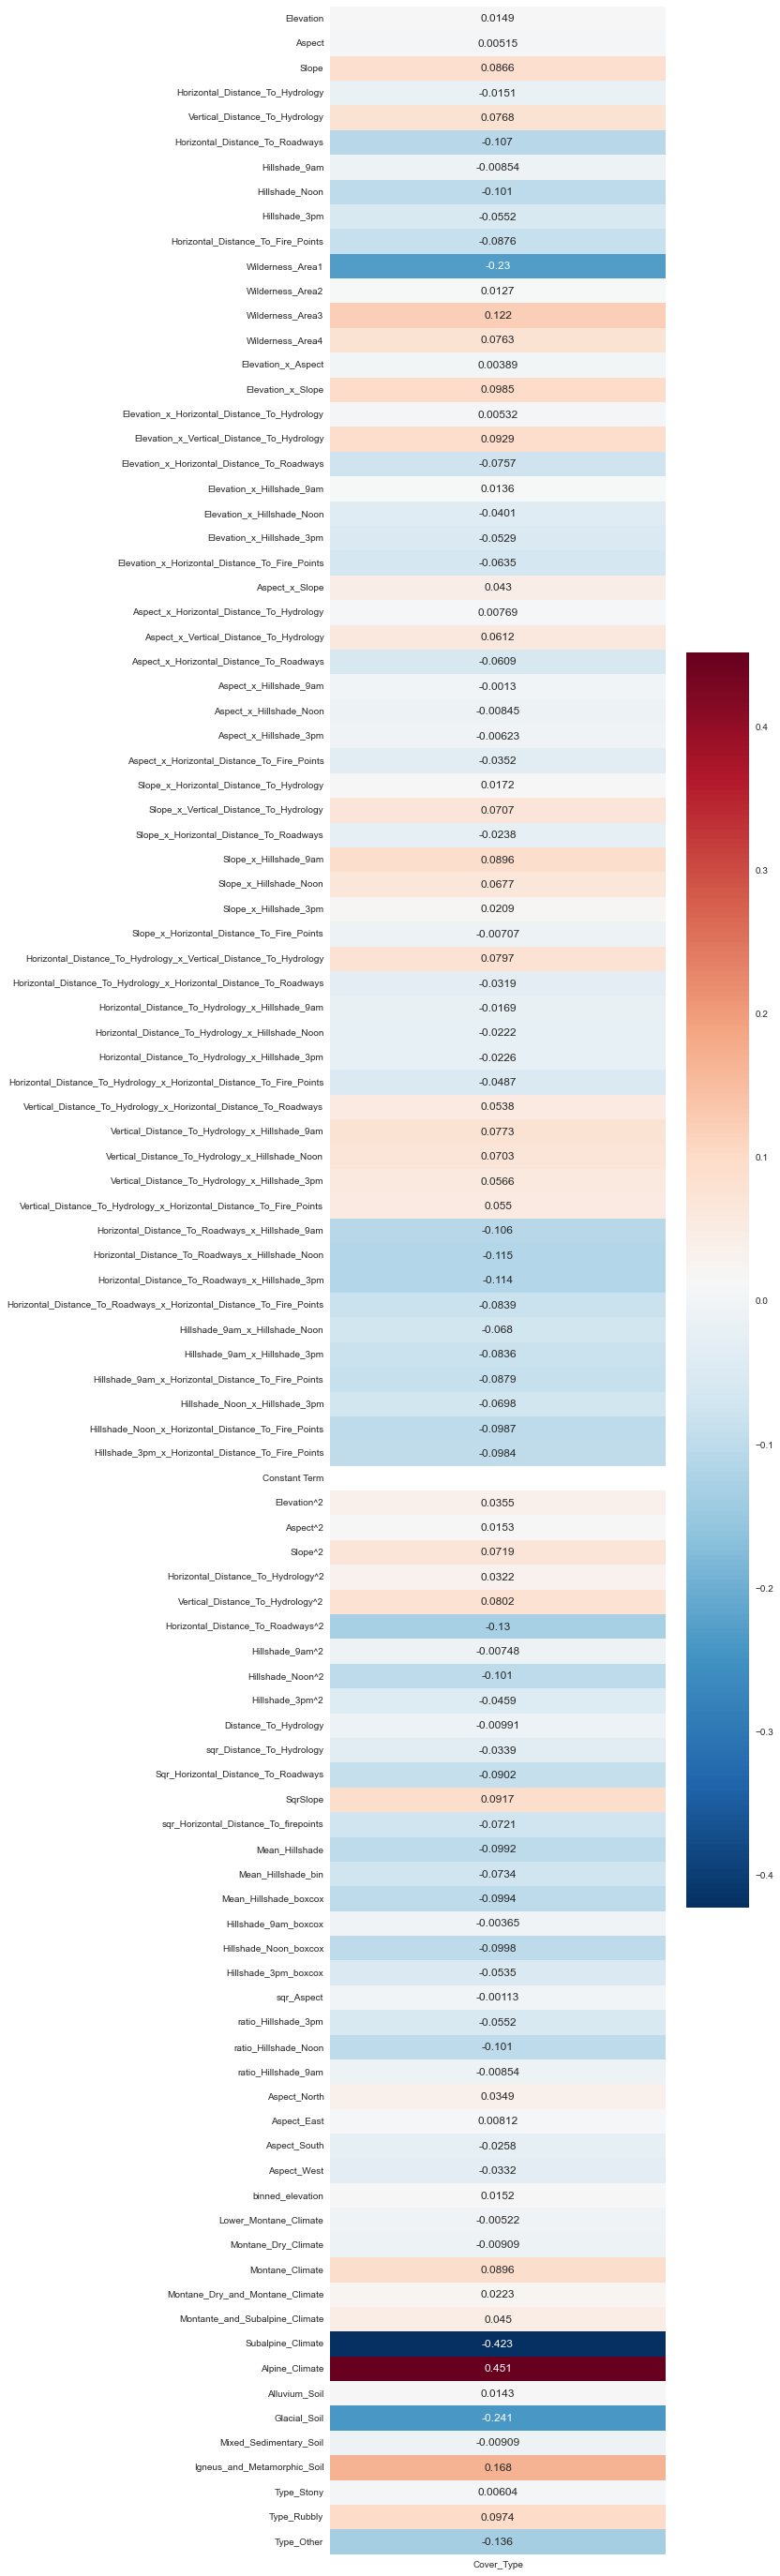

In [198]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,50))         # Sample figsize in inches

corr_matrix = X_y.corr()

# Isolate the column corresponding to `exam_score`
corr_target = corr_matrix[['Cover_Type']].drop(labels=['Cover_Type'])

sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r',ax=ax)
plt.show()

In [199]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X_train, y_train,num_feats)
print(str(len(cor_feature)), 'selected features')

46 selected features


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning:

invalid value encountered in true_divide

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning:

invalid value encountered in true_divide



In [200]:
cor_feature

['Slope_x_Hillshade_Noon',
 'Hillshade_9am_x_Hillshade_Noon',
 'Hillshade_Noon_x_Hillshade_3pm',
 'Vertical_Distance_To_Hydrology_x_Hillshade_Noon',
 'Slope_x_Vertical_Distance_To_Hydrology',
 'Slope^2',
 'sqr_Horizontal_Distance_To_firepoints',
 'Mean_Hillshade_bin',
 'Elevation_x_Horizontal_Distance_To_Roadways',
 'Wilderness_Area4',
 'Vertical_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology_x_Hillshade_9am',
 'Horizontal_Distance_To_Hydrology_x_Vertical_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology^2',
 'Hillshade_9am_x_Hillshade_3pm',
 'Horizontal_Distance_To_Roadways_x_Horizontal_Distance_To_Fire_Points',
 'Slope',
 'Horizontal_Distance_To_Fire_Points',
 'Hillshade_9am_x_Horizontal_Distance_To_Fire_Points',
 'Slope_x_Hillshade_9am',
 'Montane_Climate',
 'Sqr_Horizontal_Distance_To_Roadways',
 'SqrSlope',
 'Elevation_x_Vertical_Distance_To_Hydrology',
 'Type_Rubbly',
 'Hillshade_3pm_x_Horizontal_Distance_To_Fire_Points',
 'Elevation_x_Slope',
 'Hillshade_Noon_x_

## <font color=green> 6.5. Recursive Feature Elimination <font>

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [201]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(max_iter=3000), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_train, y_train)

Fitting estimator with 103 features.
Fitting estimator with 93 features.
Fitting estimator with 83 features.
Fitting estimator with 73 features.
Fitting estimator with 63 features.
Fitting estimator with 53 features.


RFE(estimator=LogisticRegression(max_iter=3000), n_features_to_select=46,
    step=10, verbose=5)

In [202]:
rfe_support = rfe_selector.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

46 selected features


In [203]:
rfe_feature

['Elevation',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Elevation_x_Aspect',
 'Elevation_x_Slope',
 'Elevation_x_Horizontal_Distance_To_Hydrology',
 'Elevation_x_Vertical_Distance_To_Hydrology',
 'Elevation_x_Horizontal_Distance_To_Roadways',
 'Elevation_x_Hillshade_9am',
 'Elevation_x_Hillshade_Noon',
 'Elevation_x_Hillshade_3pm',
 'Aspect_x_Hillshade_3pm',
 'Slope_x_Hillshade_9am',
 'Horizontal_Distance_To_Hydrology_x_Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Hydrology_x_Hillshade_Noon',
 'Vertical_Distance_To_Hydrology_x_Hillshade_Noon',
 'Horizontal_Distance_To_Roadways_x_Hillshade_9am',
 'Horizontal_Distance_To_Roadways_x_Hillshade_Noon',
 'Horizontal_Distance_To_Roadways_x_Hillshade_3pm',
 'Horizontal_Distance_To_Roadways_x_Horizontal_Distance_To_Fire_Points',
 'Hillshade_9am_x_Horizont

## <font color=green> 6.6. Tree-based: SelectFromModel <font>
### <font color=green> 6.6.1 RandomForestClassifier<font>
Embedded methods use algorithms that have built-in feature selection methods. We can also use RandomForest to select features based on feature importance. We calculate feature importance using node impurities in each decision tree. In Random forest, the final feature importance is the average of all decision tree feature importance.

In [204]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(), max_features=46)

In [205]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

26 selected features


In [206]:
embeded_rf_feature

['Elevation',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area4',
 'Elevation_x_Horizontal_Distance_To_Hydrology',
 'Elevation_x_Horizontal_Distance_To_Roadways',
 'Elevation_x_Hillshade_9am',
 'Elevation_x_Hillshade_Noon',
 'Elevation_x_Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Hydrology_x_Hillshade_Noon',
 'Horizontal_Distance_To_Roadways_x_Hillshade_9am',
 'Horizontal_Distance_To_Roadways_x_Hillshade_Noon',
 'Horizontal_Distance_To_Roadways_x_Hillshade_3pm',
 'Horizontal_Distance_To_Roadways_x_Horizontal_Distance_To_Fire_Points',
 'Hillshade_9am_x_Hillshade_Noon',
 'Hillshade_9am_x_Horizontal_Distance_To_Fire_Points',
 'Hillshade_Noon_x_Horizontal_Distance_To_Fire_Points',
 'Elevation^2',
 'Horizontal_Distance_To_Roadways^2',
 'Sqr_Horizontal_Distance_To_Roadways',
 'sqr_Horizontal_Distance_To_firepoints',
 'Hillshade_9am_boxcox',
 'binned_elevation',
 'Lower_Montane_Climate',
 'Subalpine_Climate',
 'Alpine_Climate']

### <font color=green> 6.6.2 XgBoost <font>

XGBoost is relatively straightforward to retrieve importance scores for each attribute.

Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.This importance is calculated explicitly for each attribute in the dataset, allowing attributes to be ranked and compared to each other.


In [207]:
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
#y_train needs to be transformed from 1,2,3,4,5,6,7 to 0 1 2 3 4 5,6
le = LabelEncoder()
y_train1 = le.fit_transform(y_train)

model=xgb.XGBClassifier(learning_rate=0.1,n_estimators = 400,max_depth = 3,n_jobs=-1)

embeded_xgb_selector = SelectFromModel(model, max_features=num_feats)
embeded_xgb_selector.fit(X_train, y_train1)


SelectFromModel(estimator=XGBClassifier(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, gamma=None,
                                        gpu_id=None, grow_policy=None,
                                        importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=0.1, max_bin=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=3,
                                        max_leaves=None, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        n_estimators=400, n_jobs=-1,
                                        num_parallel_tree=None, predictor=None,
                                        random_state=None, reg_alpha=None,
                                        reg_lambda=None, ...),
                max_features=46)

In [208]:
embeded_xgb_support = embeded_xgb_selector.get_support()
embeded_xgb_feature = X_train.loc[:,embeded_xgb_support].columns.tolist()
print(str(len(embeded_xgb_feature)), 'selected features')

17 selected features


In [209]:
embeded_xgb_feature

['Elevation',
 'Wilderness_Area1',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Elevation_x_Horizontal_Distance_To_Hydrology',
 'Elevation_x_Hillshade_Noon',
 'Slope_x_Horizontal_Distance_To_Hydrology',
 'Horizontal_Distance_To_Hydrology_x_Hillshade_3pm',
 'Hillshade_9am_x_Hillshade_Noon',
 'Vertical_Distance_To_Hydrology^2',
 'Lower_Montane_Climate',
 'Montane_Climate',
 'Subalpine_Climate',
 'Alpine_Climate',
 'Igneus_and_Metamorphic_Soil',
 'Type_Stony',
 'Type_Other']

### <font color=green> 6.6.2 ExtraTreesClassifier <font>

Each Decision Tree in the Extra Trees Forest is constructed from the original training sample. Then, at each test node, Each tree is provided with a random sample of k features from the feature-set from which each decision tree must select the best feature to split the data based on some mathematical criteria (typically the Gini Index). This random sample of features leads to the creation of multiple de-correlated decision trees.
To perform feature selection using the above forest structure, during the construction of the forest, for each feature, the normalized total reduction in the mathematical criteria used in the decision of feature of split (Gini Index if the Gini Index is used in the construction of the forest) is computed. This value is called the Gini Importance of the feature.

In [210]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_model= ExtraTreesClassifier()
# Training the model
extra_tree_forest_selector = SelectFromModel(ExtraTreesClassifier(max_features=num_feats,criterion='gini',n_jobs=-1))
extra_tree_forest_selector.fit(X_train, y_train)

SelectFromModel(estimator=ExtraTreesClassifier(max_features=46, n_jobs=-1))

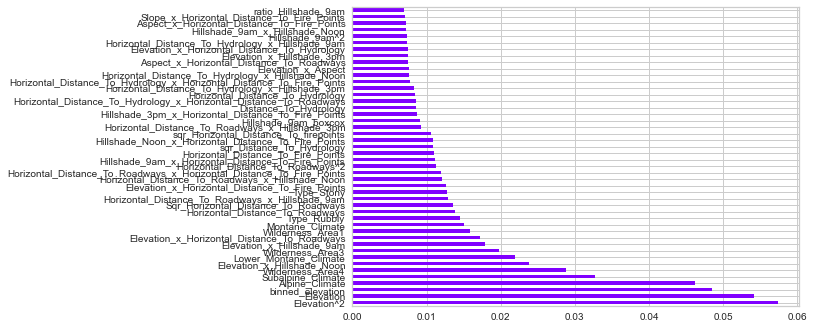

In [211]:
extra_tree_model.fit(X_train,y_train)
extra_tree_model.feature_importances_
#plot graph of feature importances for better visualization
feat_importances = pd.Series(extra_tree_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(num_feats).plot(kind='barh', colormap = 'rainbow')
plt.show()

In [212]:
extra_tree_forest_support = extra_tree_forest_selector.get_support()
extra_tree_forest_feature = X_train.loc[:,extra_tree_forest_support].columns.tolist()
print(str(len(extra_tree_forest_feature)), 'selected features')

26 selected features


In [213]:
extra_tree_forest_feature

['Elevation',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Elevation_x_Horizontal_Distance_To_Roadways',
 'Elevation_x_Hillshade_Noon',
 'Elevation_x_Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Roadways_x_Hillshade_9am',
 'Horizontal_Distance_To_Roadways_x_Hillshade_Noon',
 'Horizontal_Distance_To_Roadways_x_Horizontal_Distance_To_Fire_Points',
 'Hillshade_9am_x_Horizontal_Distance_To_Fire_Points',
 'Hillshade_Noon_x_Horizontal_Distance_To_Fire_Points',
 'Elevation^2',
 'Horizontal_Distance_To_Roadways^2',
 'sqr_Distance_To_Hydrology',
 'Sqr_Horizontal_Distance_To_Roadways',
 'sqr_Horizontal_Distance_To_firepoints',
 'Hillshade_9am_boxcox',
 'binned_elevation',
 'Lower_Montane_Climate',
 'Montane_Climate',
 'Subalpine_Climate',
 'Alpine_Climate',
 'Type_Stony']

Baruta 

In [214]:

from sklearn.ensemble import RandomForestClassifier

# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [215]:
X = pd.DataFrame(X_train).to_numpy()

In [216]:
y = pd.DataFrame(y_train).to_numpy()

In [217]:
from boruta import BorutaPy

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(X, y)

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	103
Rejected: 	0


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	103
Rejected: 	0


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	103
Rejected: 	0


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	103
Rejected: 	0


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	103
Rejected: 	0


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	103
Rejected: 	0


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	103
Rejected: 	0


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	8 / 100
Confirmed: 	97
Tentative: 	6
Rejected: 	0


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	9 / 100
Confirmed: 	97
Tentative: 	6
Rejected: 	0


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	10 / 100
Confirmed: 	97
Tentative: 	2
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	11 / 100
Confirmed: 	97
Tentative: 	2
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	12 / 100
Confirmed: 	97
Tentative: 	2
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	13 / 100
Confirmed: 	97
Tentative: 	2
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	14 / 100
Confirmed: 	97
Tentative: 	2
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	15 / 100
Confirmed: 	97
Tentative: 	2
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	16 / 100
Confirmed: 	97
Tentative: 	2
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	17 / 100
Confirmed: 	97
Tentative: 	2
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	18 / 100
Confirmed: 	97
Tentative: 	2
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	19 / 100
Confirmed: 	97
Tentative: 	2
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	20 / 100
Confirmed: 	97
Tentative: 	2
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	21 / 100
Confirmed: 	97
Tentative: 	2
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	22 / 100
Confirmed: 	97
Tentative: 	2
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	23 / 100
Confirmed: 	97
Tentative: 	2
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	24 / 100
Confirmed: 	97
Tentative: 	2
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	25 / 100
Confirmed: 	97
Tentative: 	2
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	26 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	27 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	28 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	29 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	30 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	31 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	32 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	33 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	34 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	35 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	36 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	37 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	38 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	39 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	40 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	41 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	42 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	43 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	44 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	45 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	46 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	47 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	48 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	49 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	50 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	51 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	52 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	53 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	54 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	55 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	56 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	57 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	58 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	59 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	60 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	61 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	62 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	63 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	64 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	65 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	66 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	67 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	68 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	69 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	70 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	71 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	72 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	73 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	74 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	75 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	76 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	77 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	78 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	79 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	80 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	81 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	82 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	83 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	84 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	85 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	86 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	87 / 100
Confirmed: 	98
Tentative: 	1
Rejected: 	4


/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/boruta/boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	88 / 100
Confirmed: 	98
Tentative: 	0
Rejected: 	5


BorutaPy finished running.

Iteration: 	89 / 100
Confirmed: 	98
Tentative: 	0
Rejected: 	5


In [218]:

# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(X_train, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: Elevation                 Rank: 1,  Keep: True
Feature: Aspect                    Rank: 1,  Keep: True
Feature: Slope                     Rank: 1,  Keep: True
Feature: Horizontal_Distance_To_Hydrology Rank: 1,  Keep: True
Feature: Vertical_Distance_To_Hydrology Rank: 1,  Keep: True
Feature: Horizontal_Distance_To_Roadways Rank: 1,  Keep: True
Feature: Hillshade_9am             Rank: 1,  Keep: True
Feature: Hillshade_Noon            Rank: 1,  Keep: True
Feature: Hillshade_3pm             Rank: 1,  Keep: True
Feature: Horizontal_Distance_To_Fire_Points Rank: 1,  Keep: True
Feature: Wilderness_Area1          Rank: 1,  Keep: True
Feature: Wilderness_Area2          Rank: 1,  Keep: True
Feature: Wilderness_Area3          Rank: 1,  Keep: True
Feature: Wilderness_Area4          Rank: 1,  Keep: True
Feature: Elevation_x_Aspect        Rank: 1,  Keep: True
Feature: Elevation_x_Slope         Rank: 1,  Keep: True
Feature: Elevation_x_Horizontal_Distance_To_Hydrology Rank: 1,  Keep: True
Fe

## <font color=green> 6.6. Score of all methods together  <font>

In [219]:
feature_name = list(X_train.columns)

In [220]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name,'ExtraTree':extra_tree_forest_support, 'Pearson':cor_support, 'RFE':rfe_support,'Anova':anov_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'XGB':embeded_xgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

Feature  ExtraTree  Pearson  \
1                                    Wilderness_Area4       True     True   
2                                   Subalpine_Climate       True     True   
3               sqr_Horizontal_Distance_To_firepoints       True     True   
4                                    Wilderness_Area3       True     True   
5                                    Wilderness_Area1       True     True   
6                 Sqr_Horizontal_Distance_To_Roadways       True     True   
7                                     Montane_Climate       True     True   
8                               Lower_Montane_Climate       True    False   
9   Horizontal_Distance_To_Roadways_x_Horizontal_D...       True     True   
10                  Horizontal_Distance_To_Roadways^2       True     True   
11                                          Elevation       True    False   
12                                     Alpine_Climate       True     True   
13                                   binned_elevation       True    False   
14   Horizontal_Distance_To_Roadways_x_Hillshade_Noon       True     True   
15    Horizontal_Distance_To_Roadways_x_Hillshade_9am       True     True   
16                    Horizontal_Distance_To_Roadways       True     True   
17                 Horizontal_Distance_To_Fire_Points       True     True   
18  Hillshade_Noon_x_Horizontal_Distance_To_Fire_P...       True     True   
19  Hillshade_9am_x_Horizontal_Distance_To_Fire_Po...       True     True   
20                     Hillshade_9am_x_Hillshade_Noon      False     True   
21                               Hillshade_9am_boxcox       True    False   
22        Elevation_x_Horizontal_Distance_To_Roadways       True     True   
23       Elevation_x_Horizontal_Distance_To_Hydrology      False    False   
24                         Elevation_x_Hillshade_Noon       True    False   
25                                        Elevation^2       True    False   
26                          sqr_Distance_To_Hydrology       True    False   
27                                         Type_Stony       True    False   
28                                        Type_Rubbly      False     True   
29                        Igneus_and_Metamorphic_Soil      False     True   
30    Horizontal_Distance_To_Roadways_x_Hillshade_3pm      False     True   
31  Horizontal_Distance_To_Hydrology_x_Hillshade_Noon      False    False   
32                          Elevation_x_Hillshade_9am      False    False   
33                   Vertical_Distance_To_Hydrology^2      False     True   
34                                         Type_Other      False     True   
35                              Slope_x_Hillshade_9am      False     True   
36                              Mean_Hillshade_boxcox      False     True   
37  Horizontal_Distance_To_Hydrology_x_Horizontal_...      False    False   
38   Horizontal_Distance_To_Hydrology_x_Hillshade_3pm      False    False   
39  Hillshade_3pm_x_Horizontal_Distance_To_Fire_Po...      False     True   
40     Elevation_x_Horizontal_Distance_To_Fire_Points       True    False   
41    Vertical_Distance_To_Hydrology_x_Hillshade_Noon      False     True   
42     Vertical_Distance_To_Hydrology_x_Hillshade_9am      False     True   
43                     Vertical_Distance_To_Hydrology      False     True   
44                                           SqrSlope      False     True   
45             Slope_x_Vertical_Distance_To_Hydrology      False     True   
46            Slope_x_Horizontal_Distance_To_Roadways      False    False   

      RFE  Anova  Logistics  Random Forest    XGB  Total  
1    True   True       True           True   True      7  
2    True   True       True           True   True      7  
3    True   True       True           True  False      6  
4    True   True       True          False   True      6  
5    True   True       True          False   True      6  
6    True   True       True           True  False      6  
7    True   T

Logistic Regression 
Esemble Learning and Random Forest 
Decision Trees 
Random Forest (XGB)

In [231]:
conditions = [(feature_selection_df['Total']>4)]
 
new_df = feature_selection_df.loc[feature_selection_df['Total'] >4]

In [232]:
feature_list = new_df['Feature'].to_list()
feature_list

['Wilderness_Area4',
 'Subalpine_Climate',
 'sqr_Horizontal_Distance_To_firepoints',
 'Wilderness_Area3',
 'Wilderness_Area1',
 'Sqr_Horizontal_Distance_To_Roadways',
 'Montane_Climate',
 'Lower_Montane_Climate',
 'Horizontal_Distance_To_Roadways_x_Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Roadways^2',
 'Elevation',
 'Alpine_Climate',
 'binned_elevation',
 'Horizontal_Distance_To_Roadways_x_Hillshade_Noon',
 'Horizontal_Distance_To_Roadways_x_Hillshade_9am',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'Hillshade_Noon_x_Horizontal_Distance_To_Fire_Points',
 'Hillshade_9am_x_Horizontal_Distance_To_Fire_Points',
 'Hillshade_9am_x_Hillshade_Noon',
 'Hillshade_9am_boxcox',
 'Elevation_x_Horizontal_Distance_To_Roadways',
 'Elevation_x_Horizontal_Distance_To_Hydrology',
 'Elevation_x_Hillshade_Noon',
 'Elevation^2']

#Since we want to add all the features of the dummy variale family and climate, we will remove them first. we also remove complex and soil for the time being and see how the model performs

In [233]:
new = [column for column in feature_list if 'Soil' not in column and 'Type' not in  column and 'complex' not in  column and 'Family' not in column and 'Climate' not in column ]
new
missing = (data_train.filter(regex='Family').columns)
missing2 = (data_train.filter(regex='Climate').columns)

new.extend(missing)
new.extend(missing2)
new

['Wilderness_Area4',
 'sqr_Horizontal_Distance_To_firepoints',
 'Wilderness_Area3',
 'Wilderness_Area1',
 'Sqr_Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Roadways_x_Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Roadways^2',
 'Elevation',
 'binned_elevation',
 'Horizontal_Distance_To_Roadways_x_Hillshade_Noon',
 'Horizontal_Distance_To_Roadways_x_Hillshade_9am',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Fire_Points',
 'Hillshade_Noon_x_Horizontal_Distance_To_Fire_Points',
 'Hillshade_9am_x_Horizontal_Distance_To_Fire_Points',
 'Hillshade_9am_x_Hillshade_Noon',
 'Hillshade_9am_boxcox',
 'Elevation_x_Horizontal_Distance_To_Roadways',
 'Elevation_x_Horizontal_Distance_To_Hydrology',
 'Elevation_x_Hillshade_Noon',
 'Elevation^2',
 'Lower_Montane_Climate',
 'Montane_Dry_Climate',
 'Montane_Climate',
 'Montane_Dry_and_Montane_Climate',
 'Montante_and_Subalpine_Climate',
 'Subalpine_Climate',
 'Alpine_Climate']

X_trial.shape
y_trial.shape

#Only X_Train replacement
X_trial.to_csv('X_trial.csv')
y_trial.to_csv('y_trial.csv')

In [234]:
X_selected = data_train[feature_list]
y_selected = data_train['Cover_Type']

In [235]:
#Only X_Train replacement
X_selected.to_csv('X_selected.csv')
y_selected.to_csv('y_selected.csv')

In [226]:
import pandas as pd
X_selected1 = pd.read_csv("X_selected.csv")
y_selected1 = pd.read_csv("y_selected.csv")

In [227]:
print(X_selected.shape)
print(y_selected.shape)

if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(15120, 32)
(15120,)


In [228]:
y_selected.shape

(15120,)

Test

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [230]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X_train_new,y_train_new)

NameError: name 'X_train_new' is not defined

In [ ]:
forest.score(X_val_new,y_val_new)

In [ ]:
print(classification_report(y_val_new, y_pred_test_forest))

Checking Correlation among features 

In [ ]:
#Heatmap 
matrix = X_selected.corr()
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(50,20))
heatmap = sns.heatmap(matrix, center=0, fmt=".3f", square=True, annot=True, linewidth=1.3, mask = mask,vmax=0.9);
plt.show()